# 1. Analyse exploratoire des données.

## 1.1. TRAITEMENT PRÉLIMINAIRE DES LIGNES ET COLONNES DU DATASET.

In [1]:
import numpy as np
import pandas as pd
import mytools as mt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [3]:
data.shape

(3376, 46)

In [4]:
data.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


### 1.1.1 LIGNES INUTILES

La variable **OSEBuildingID** permet d'identifier chaque propriété de façon unique. Comme les données datent de la même année (2016), une même propriété ne doit pas apparaître deux fois :

In [5]:
data[data.duplicated(subset='OSEBuildingID', keep=False)]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


Il n'y a pas de doublons. On peut donc passer la variable **OSEBuildingID** en index :

In [6]:
data.set_index('OSEBuildingID', inplace=True)
data.head()

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


Notre étude porte uniquement sur **les batiments non destinés à l'habitation**. Nous allons donc exclure de notre dataset les bâtiments residentiels :

In [7]:
data.BuildingType.unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [8]:
residentiels = ['Multifamily MR (5-9)', 'Multifamily LR (1-4)', 'Multifamily HR (10+)']
for residentiel in residentiels:
    data = data[data.BuildingType != residentiel]

In [9]:
data.PrimaryPropertyType.unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Office'], dtype=object)

In [10]:
data.loc[data.PrimaryPropertyType == 'Low-Rise Multifamily', ['BuildingType', 'LargestPropertyUseType', 'ListOfAllPropertyUseTypes']]

,BuildingType,LargestPropertyUseType,ListOfAllPropertyUseTypes
OSEBuildingID,,,
19445,NonResidential,Multifamily Housing,Multifamily Housing
21481,Campus,Multifamily Housing,"Bar/Nightclub, Food Sales, Multifamily Housing..."
25674,NonResidential,Multifamily Housing,"Bar/Nightclub, Multifamily Housing"


On peut aussi supprimer les entrées dont le **PrimaryPropertyType** correspond à 'Residence Hall' (Résidence étudiante) ou 'Low-Rise Multifamily' (Leur usage principal est l'habitat d'après le tableau ci-dessus) :

In [11]:
data = data[(data.PrimaryPropertyType != 'Residence Hall') & (data.PrimaryPropertyType != 'Low-Rise Multifamily')]

In [12]:
data.shape

(1644, 45)

### 1.1.2 VARIABLES CREUSES ET PEU UTILES

Affichons maintenant le taux de valeurs manquantes de chaque variable. J'utilise à nouveau une fonction de mon module `mytools.py` :

In [13]:
mt.valeurs_manquantes(data)

,effectif,taux
DataYear,0,0.0
BuildingType,0,0.0
PrimaryPropertyType,0,0.0
PropertyName,0,0.0
Address,0,0.0
City,0,0.0
State,0,0.0
ZipCode,16,1.0
TaxParcelIdentificationNumber,0,0.0
CouncilDistrictCode,0,0.0


Nous allons supprimer les variables dont l'information est peu utile pour notre étude et celles qui sont presque vides :

In [14]:
data.drop(columns=['DataYear', 'City', 'State', 'YearsENERGYSTARCertified', 'Comments', 'Outlier'], inplace=True)

In [15]:
data.shape

(1644, 39)

Les variables énergétiques sont toutes quasi-pleines et quelques-unes sont données avec deux unités de mesure différentes. Pour simplifier, nous allons conserver celles données en kBtu, qui est l'unité la plus largement utilisée dans le jeu de données :

In [16]:
data.drop(columns=['Electricity(kWh)', 'NaturalGas(therms)'], inplace=True)

In [17]:
data.shape

(1644, 37)

Certaines variables sont obtenues à partir d'autres variables plus fondamentales. C'est le cas par exemple de la variable **SiteEUI(kBtu/sf)** qui représente la quantité totale d'énergie consommée par unité de surface, c'est à dire **SiteEnergyUse(kBtu)** divisée par **PropertyGFABuilding(s)**. De même pour la variable **GHGEmissionsIntensity** qui est obtenue en divisant **TotalGHGEmissions** par **PropertyGFABuilding(s)**. Supprimons ces variables :

In [18]:
data.drop(columns=['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'GHGEmissionsIntensity'], inplace=True)

In [19]:
data.shape

(1644, 34)

Enfin, certaines variables contiennent une information quasi-redondante déjà présente dans une autre variable. C'est le cas par exemple des variables **SiteEnergyUse(kBtu)** et **SiteEnergyUseWN(kBtu)** : la première représente la quantité totale d'énergie consommée par an et la seconde la même quantité ajustée en fonction du climat moyen des 30 dernières années. 
De même avec les variables **SourceEUI(kBtu/sf)** et **SourceEUIWN(kBtu/sf)**. 

Nous retenons uniquement les premières dans un souci de cohérence, car les autres variables energétiques du dataset ne sont pas ajustées : 

In [20]:
data.drop(columns=['SiteEnergyUseWN(kBtu)', 'SourceEUIWN(kBtu/sf)'], inplace=True)

In [21]:
data.shape

(1644, 32)

## 1.2. VALEURS ABERRANTES.

Affichons le tableau des principaux indicateurs statistiques de chaque variable. J'utilise à nouveau une fonction de mon module `mytools.py` :

In [22]:
mt.stats(data)

,count,mean,std,min,25%,50%,75%,max
ZipCode,1628.0,98116.650,1.794900e+01,98006.000,98105.000,98109.000,98125.000,9.819900e+04
CouncilDistrictCode,1644.0,4.355,2.201000e+00,1.000,2.000,4.000,7.000,7.000000e+00
Latitude,1644.0,47.616,4.800000e-02,47.499,47.585,47.612,47.649,4.773400e+01
Longitude,1644.0,-122.333,2.500000e-02,-122.412,-122.343,-122.333,-122.322,-1.222590e+02
YearBuilt,1644.0,1961.936,3.266800e+01,1900.000,1930.000,1965.000,1989.000,2.015000e+03
NumberofBuildings,1642.0,1.172,2.953000e+00,0.000,1.000,1.000,1.000,1.110000e+02
NumberofFloors,1644.0,4.128,6.600000e+00,0.000,1.000,2.000,4.000,9.900000e+01
PropertyGFATotal,1644.0,119532.889,2.993950e+05,11285.000,29595.500,49712.000,105070.750,9.320156e+06
PropertyGFAParking,1644.0,13020.979,4.254671e+04,0.000,0.000,0.000,0.000,5.126080e+05
PropertyGFABuilding(s),1644.0,106511.910,2.861678e+05,3636.000,28498.000,47557.000,94553.250,9.320156e+06


Deux variables enérgétiques contiennent des valeurs négatives, ce qui est impossible. Nous allons supprimer ces valeurs pour les traiter ultérieurement :

In [23]:
features = ['Electricity(kBtu)', 'TotalGHGEmissions']
for feature in features:
    condition = (data[feature] < 0)
    data[feature].mask(condition, inplace=True)

In [24]:
mt.stats(data)

,count,mean,std,min,25%,50%,75%,max
ZipCode,1628.0,98116.650,1.794900e+01,98006.000,98105.000,98109.000,98125.000,9.819900e+04
CouncilDistrictCode,1644.0,4.355,2.201000e+00,1.000,2.000,4.000,7.000,7.000000e+00
Latitude,1644.0,47.616,4.800000e-02,47.499,47.585,47.612,47.649,4.773400e+01
Longitude,1644.0,-122.333,2.500000e-02,-122.412,-122.343,-122.333,-122.322,-1.222590e+02
YearBuilt,1644.0,1961.936,3.266800e+01,1900.000,1930.000,1965.000,1989.000,2.015000e+03
NumberofBuildings,1642.0,1.172,2.953000e+00,0.000,1.000,1.000,1.000,1.110000e+02
NumberofFloors,1644.0,4.128,6.600000e+00,0.000,1.000,2.000,4.000,9.900000e+01
PropertyGFATotal,1644.0,119532.889,2.993950e+05,11285.000,29595.500,49712.000,105070.750,9.320156e+06
PropertyGFAParking,1644.0,13020.979,4.254671e+04,0.000,0.000,0.000,0.000,5.126080e+05
PropertyGFABuilding(s),1644.0,106511.910,2.861678e+05,3636.000,28498.000,47557.000,94553.250,9.320156e+06


La variable **SiteEnergyUse(kBtu)** représente l'énergie totale consommée par un bâtiment et par an, sous toutes ses formes. Elle ne peut donc pas être inférieure à la quantité de vapeur, d'électricité ou de gaz consommée annuellement :

In [25]:
condition = (data['SteamUse(kBtu)'] > data['SiteEnergyUse(kBtu)']) |\
            (data['Electricity(kBtu)'] > data['SiteEnergyUse(kBtu)']) |\
            (data['NaturalGas(kBtu)'] > data['SiteEnergyUse(kBtu)'])

data[condition].shape[0]

82

Il y a 82 lignes concernées par cette aberration, ce qui n'est pas négligeable (5%). Nous allons remplacer les valeurs concernées de **SiteEnergyUse(kBtu)** par les valeurs correspondantes de **SteamUse(kBtu)**, **Electricity(kBtu)** ou **NaturalGas(kBtu)** :

In [26]:
features = ['SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']

for feature in features:
    condition = (data[feature] > data['SiteEnergyUse(kBtu)'])
    data.loc[condition,'SiteEnergyUse(kBtu)'] = data.loc[condition,feature]

In [27]:
condition = (data['SteamUse(kBtu)'] > data['SiteEnergyUse(kBtu)']) |\
            (data['Electricity(kBtu)'] > data['SiteEnergyUse(kBtu)']) |\
            (data['NaturalGas(kBtu)'] > data['SiteEnergyUse(kBtu)'])

data[condition].shape[0]

0

De même, les valeurs de **SiteEnergyUse(kBtu)** ne peuvent pas être inférieures à la somme des trois énergies :

In [28]:
condition = (data['SteamUse(kBtu)'] + data['Electricity(kBtu)'] + data['NaturalGas(kBtu)'] > data['SiteEnergyUse(kBtu)'])

data[condition].shape[0]

255

Plus de 15% des lignes sont concernées par cette aberration ! Nous allons simplement remplacer les valeurs concernées de **SiteEnergyUse(kBtu)** par la somme des valeurs correspondantes des trois énergies :

In [29]:
data.loc[condition,'SiteEnergyUse(kBtu)'] = data.loc[condition, 'SteamUse(kBtu)'] + \
                                            data.loc[condition, 'Electricity(kBtu)'] + \
                                            data.loc[condition, 'NaturalGas(kBtu)']

In [30]:
condition = (data['SteamUse(kBtu)'] + data['Electricity(kBtu)'] + data['NaturalGas(kBtu)'] > data['SiteEnergyUse(kBtu)'])

data[condition].shape[0]

0

Regardons maintenant le nombre de bâtiments qui n'ont aucun relevé energétique :

In [31]:
condition = (data['SiteEnergyUse(kBtu)'] == 0)
data[condition].shape[0]

5

Il n'y en a que 5. Regardons les de plus près :

In [32]:
data.loc[condition, ['PrimaryPropertyType', 'ListOfAllPropertyUseTypes', 'PropertyGFABuilding(s)']]

,PrimaryPropertyType,ListOfAllPropertyUseTypes,PropertyGFABuilding(s)
OSEBuildingID,,,
34,K-12 School,K-12 School,126351
242,K-12 School,K-12 School,52792
435,Other,"Convention Center, Parking",1400000
19776,Other,Other - Education,29924
21616,K-12 School,K-12 School,42292


Une école ou un centre éducatif qui a une surface en bâtiment non négligeable doit nécessairement consommer de l'énergie. Ces valeurs énergétiques sont donc aberrantes et ces lignes, inutiles pour notre étude. Supprimons-les :

In [33]:
data = data[~condition]

In [34]:
data.shape

(1639, 32)

Enfin, regardons les propriétés qui ont une empreinte carbone nulle :

In [35]:
data.loc[data.TotalGHGEmissions == 0, ['PrimaryPropertyType', 'LargestPropertyUseType', 'SiteEnergyUse(kBtu)', 
                                       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']]

,PrimaryPropertyType,LargestPropertyUseType,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu)
OSEBuildingID,,,,,,
700,Supermarket / Grocery Store,Supermarket/Grocery Store,12525174.0,0.0,0.0,0.0


Un supermarché ou une épicerie qui consomme des millions de kBtu d'énergie tout en ne consommant ni electricité, ni gaz, ni vapeur et qui plus est, n'émet pas de C02, est peu réaliste. La nature même de l'activité (transport et conservation des produits) nécessite de consommer de l'electricité ou du gaz et donc d'émettre du CO2. Il s'agit donc de valeurs aberrantes. Supprimons-les :

In [36]:
condition = (data.TotalGHGEmissions == 0)
data.loc[condition, ['TotalGHGEmissions', 'Electricity(kBtu)', 'NaturalGas(kBtu)']] = np.nan

In [37]:
data[data.TotalGHGEmissions == 0].shape[0]

0

## 1.3. VALEURS EXTRÊMES.

In [38]:
mt.stats(data).shape[0]

20

Affichons les distributions de nos 20 variables quantitatives :

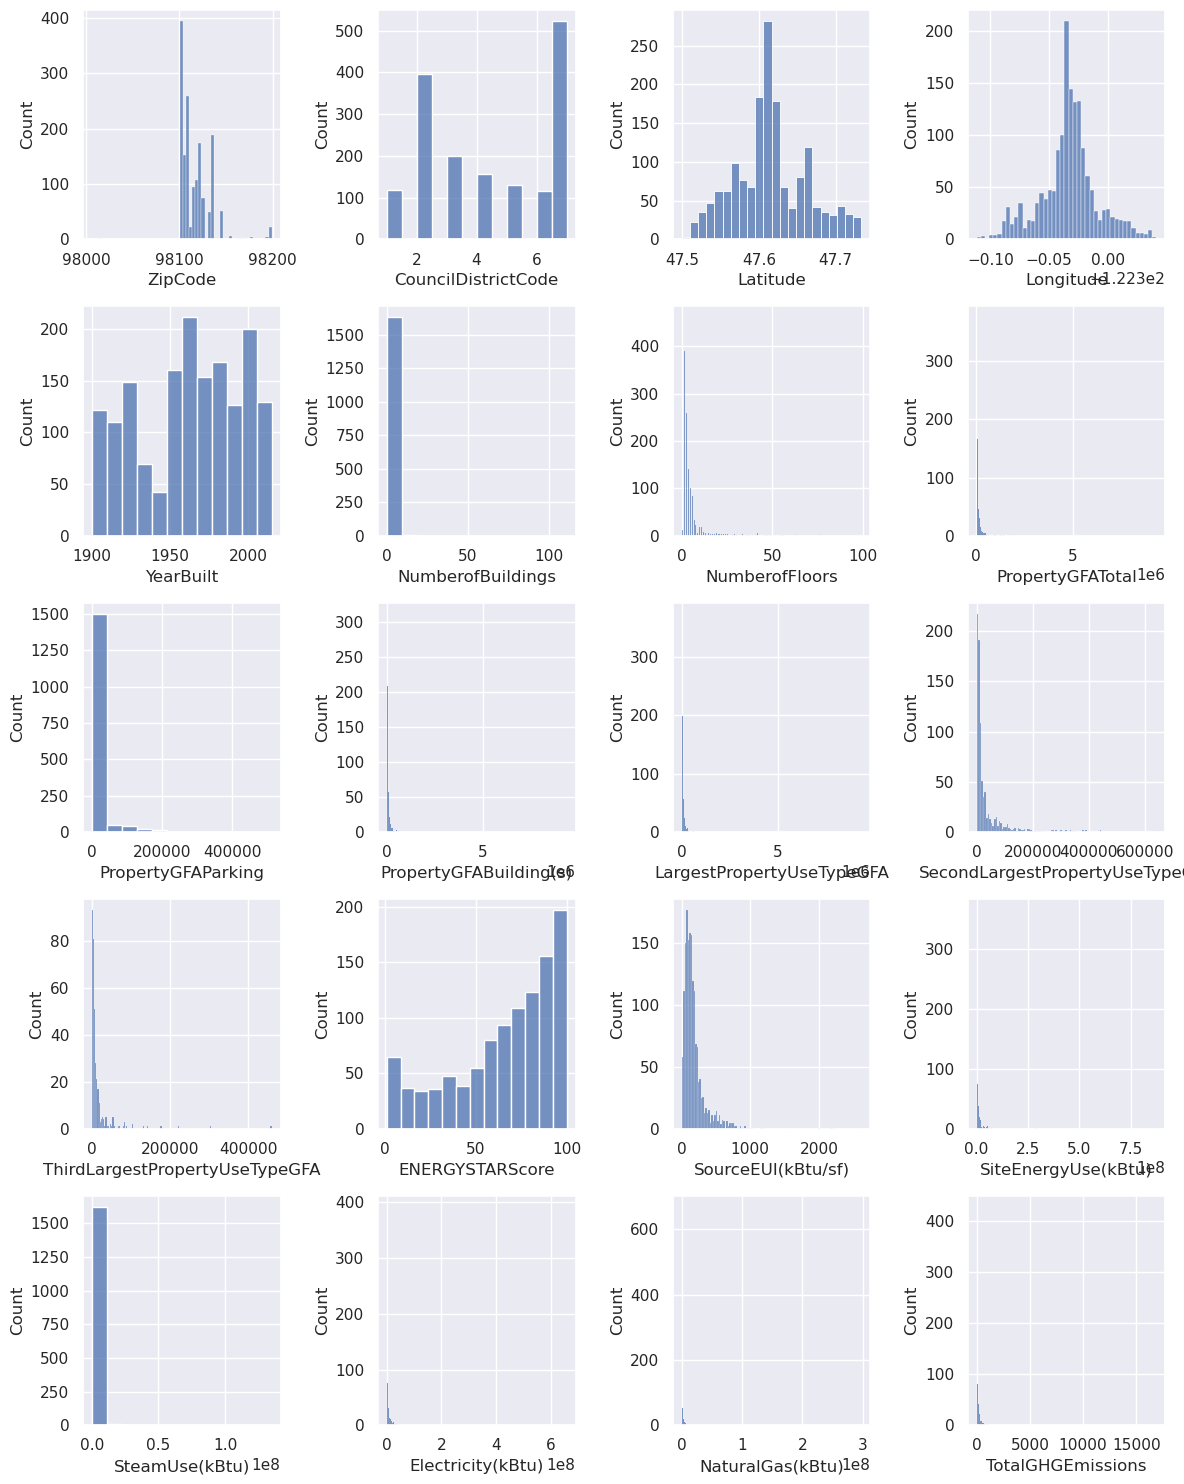

In [39]:
sns.set(style='darkgrid')
features = mt.stats(data).index
fig, axe = plt.subplots(5,4, figsize=(12,15))
axe = axe.flatten()
for i, feature in enumerate(features):
    sns.histplot(x=feature, data=data, ax=axe[i])
plt.tight_layout()
plt.show()

Certains histogrammes sont très peu lisibles en raison de la présence de valeurs anormalement élevées. Nous allons identifier et traiter ces valeurs gênantes. Commençons par **PropertyGFATotal** :

In [40]:
data[data.PropertyGFATotal > 2*10**6].shape[0]

2

Il n'y a que 2 propriétés (sur 1639) qui ont des surfaces totales supérieures à 2 millions de pieds carrés, ce qui est anormalement élevé comparé aux surfaces des autres propriétés. Remplaçons ces valeurs par la surface totale médiane :

In [41]:
condition = (data.PropertyGFATotal > 2*10**6)
data.loc[condition,'PropertyGFATotal'] = data.PropertyGFATotal.median()

In [42]:
data[data.PropertyGFATotal > 2*10**6].shape[0]

0

**PropertyGFABuilding(s)** :

In [43]:
data[data['PropertyGFABuilding(s)'] > 2*10**6].shape[0]

2

Il n'y a que 2 propriétés (les mêmes que les précédentes ?) qui ont des surfaces en bâtiments supérieures à 2 millions de pieds carrés, ce qui est anormalement élevé comparé aux surfaces des autres propriétés. Remplaçons ces valeurs par la surface en bâtiment médiane :

In [44]:
condition = (data['PropertyGFABuilding(s)'] > 2*10**6)
data.loc[condition,'PropertyGFABuilding(s)'] = data['PropertyGFABuilding(s)'].median()

In [45]:
data[data['PropertyGFABuilding(s)'] > 2*10**6].shape[0]

0

**LargestPropertyUseTypeGFA** :

In [46]:
data[data.LargestPropertyUseTypeGFA > 2*10**6].shape[0]

1

Il n'y a qu'une seule propriété qui a une surface d'usage principal supérieure à 2 millions de pieds carrés, ce qui est anormalement élevé comparé aux surfaces des autres propriétés. Remplaçons ces valeurs par la surface d'usage principal médiane :

In [47]:
condition = (data.LargestPropertyUseTypeGFA > 2*10**6)
data.loc[condition,'LargestPropertyUseTypeGFA'] = data.LargestPropertyUseTypeGFA.median()

In [48]:
data[data.LargestPropertyUseTypeGFA > 2*10**6].shape[0]

0

**SteamUse(kBtu)** :

In [49]:
data[data['SteamUse(kBtu)'] > 0.20*10**8].shape[0]

7

Il n'y a que 7 bâtiments qui ont des consommations en vapeur supérieures à 20 millions de kBtu ce qui est anormalement élevé comparé aux consommations des autres bâtiments. Remplaçons ces valeurs par la consommation en vapeur médiane :

In [50]:
condition = (data['SteamUse(kBtu)'] > 0.20*10**8)
data.loc[condition,'SteamUse(kBtu)'] = data['SteamUse(kBtu)'].median()

In [51]:
data[data['SteamUse(kBtu)'] > 0.2*10**8].shape[0]

0

**Electricity(kBtu)** :

In [52]:
data[data['Electricity(kBtu)'] > 10**8].shape[0]

6

Il n'y a que 6 bâtiments qui ont des consommations électriques enregistrées supérieures à 100 millions de kBtu ce qui est anormalement élevé comparé aux consommations des autres bâtiments. Remplaçons ces valeurs par la consommation électrique médiane :

In [53]:
condition = (data['Electricity(kBtu)'] > 10**8)
data.loc[condition,'Electricity(kBtu)'] = data['Electricity(kBtu)'].median()

In [54]:
data[data['Electricity(kBtu)'] > 10**8].shape[0]

0

**NaturalGas(kBtu)** :

In [55]:
data[data['NaturalGas(kBtu)'] > 0.3*10**8].shape[0]

12

Il n'y a que 12 bâtiments qui ont des consommations de gaz naturel enregistrées supérieures à 30 millions de kBtu. Remplaçons ces valeurs par la consommation de gaz naturel médiane :

In [56]:
condition = (data['NaturalGas(kBtu)'] > 0.3*10**8)
data.loc[condition,'NaturalGas(kBtu)'] = data['NaturalGas(kBtu)'].median()

In [57]:
data[data['NaturalGas(kBtu)'] > 0.3*10**8].shape[0]

0

**SiteEnergyUse(kBtu)** :

In [58]:
data[data['SiteEnergyUse(kBtu)'] > 10**8].shape[0]

11

Il n'y a que 11 bâtiments qui ont des consommations en énergie supérieures à 100 millions de kBtu. Remplaçons ces valeurs par la somme des consommations de vapeur, d'électricité et de gaz correspondantes :

In [59]:
condition = (data['SiteEnergyUse(kBtu)'] > 10**8)
data.loc[condition,'SiteEnergyUse(kBtu)'] = data.loc[condition,'SteamUse(kBtu)'] + data.loc[condition,'Electricity(kBtu)'] + \
                                            data.loc[condition,'NaturalGas(kBtu)']

In [60]:
data[data['SiteEnergyUse(kBtu)'] > 10**8].shape[0]

0

Enfin, la variable **TotalGHGEmissions** :

In [61]:
data[data.TotalGHGEmissions > 2500].shape[0]

14

Il y a 14 bâtiments recensés comme émettant plus de 2500 tonnes de CO2 par an, ce qui est très élevé par rapport aux autres bâtiments.

Dans la description de cette variable sur le site de la ville de Seattle, on peut lire que les emissions de C02 selon les sources d'énergies sont calculées comme suit :
- Électricité : 52.44 lbs CO2e/MWh ;
- Vapeur : 170.17 lbs CO2e/MBtu ;
- Gaz : 53.11 kg CO2e/MBtu.

Les données énergétiques sont exprimées en kBtu et les émissions de CO2 sont exprimées en tonnes. On va donc transformer les facteurs de conversions pour qu'ils soient en t/kBtu (rappels : 1 lbs = $0.45359*10^{-3}$ t, 1 kWh = 3.41214 kBtu et 1 M = 1000 k) :
- Électricité : 52.44 lbs/MWh = $6.971068 \times 10^{-6}$ t/kBtu
- Vapeur : 170.17 lbs/MBtu = $7.718741 \times 10^{-5}$ t/kBtu
- Gaz : 53.11 kg/MBtu = $5.311 \times 10^{-5}$ t/kBtu

On doit donc avoir :

*TotalGHGEmissions* = $6.971068 \times 10^{-6}$ *Électricité* + $7.718741 \times 10^{-5}$ *Vapeur* + $5.311 \times 10^{-5}$ *Gaz*

Nous allons donc remplacer ces 14 valeurs par les valeurs calculées à partir des valeurs energétiques correspondantes :

In [62]:
condition = (data.TotalGHGEmissions > 2500)

a = 6.971068*10**-6
b = 7.718741*10**-5
c = 5.311*10**-5

data.loc[condition,'TotalGHGEmissions'] = a*data.loc[condition,'Electricity(kBtu)'] + \
                                          b*data.loc[condition,'SteamUse(kBtu)'] + \
                                          c*data.loc[condition,'NaturalGas(kBtu)']

In [63]:
data[data.TotalGHGEmissions > 2500].shape[0]

0

Voilà. Affichons à nouveau les distributions :

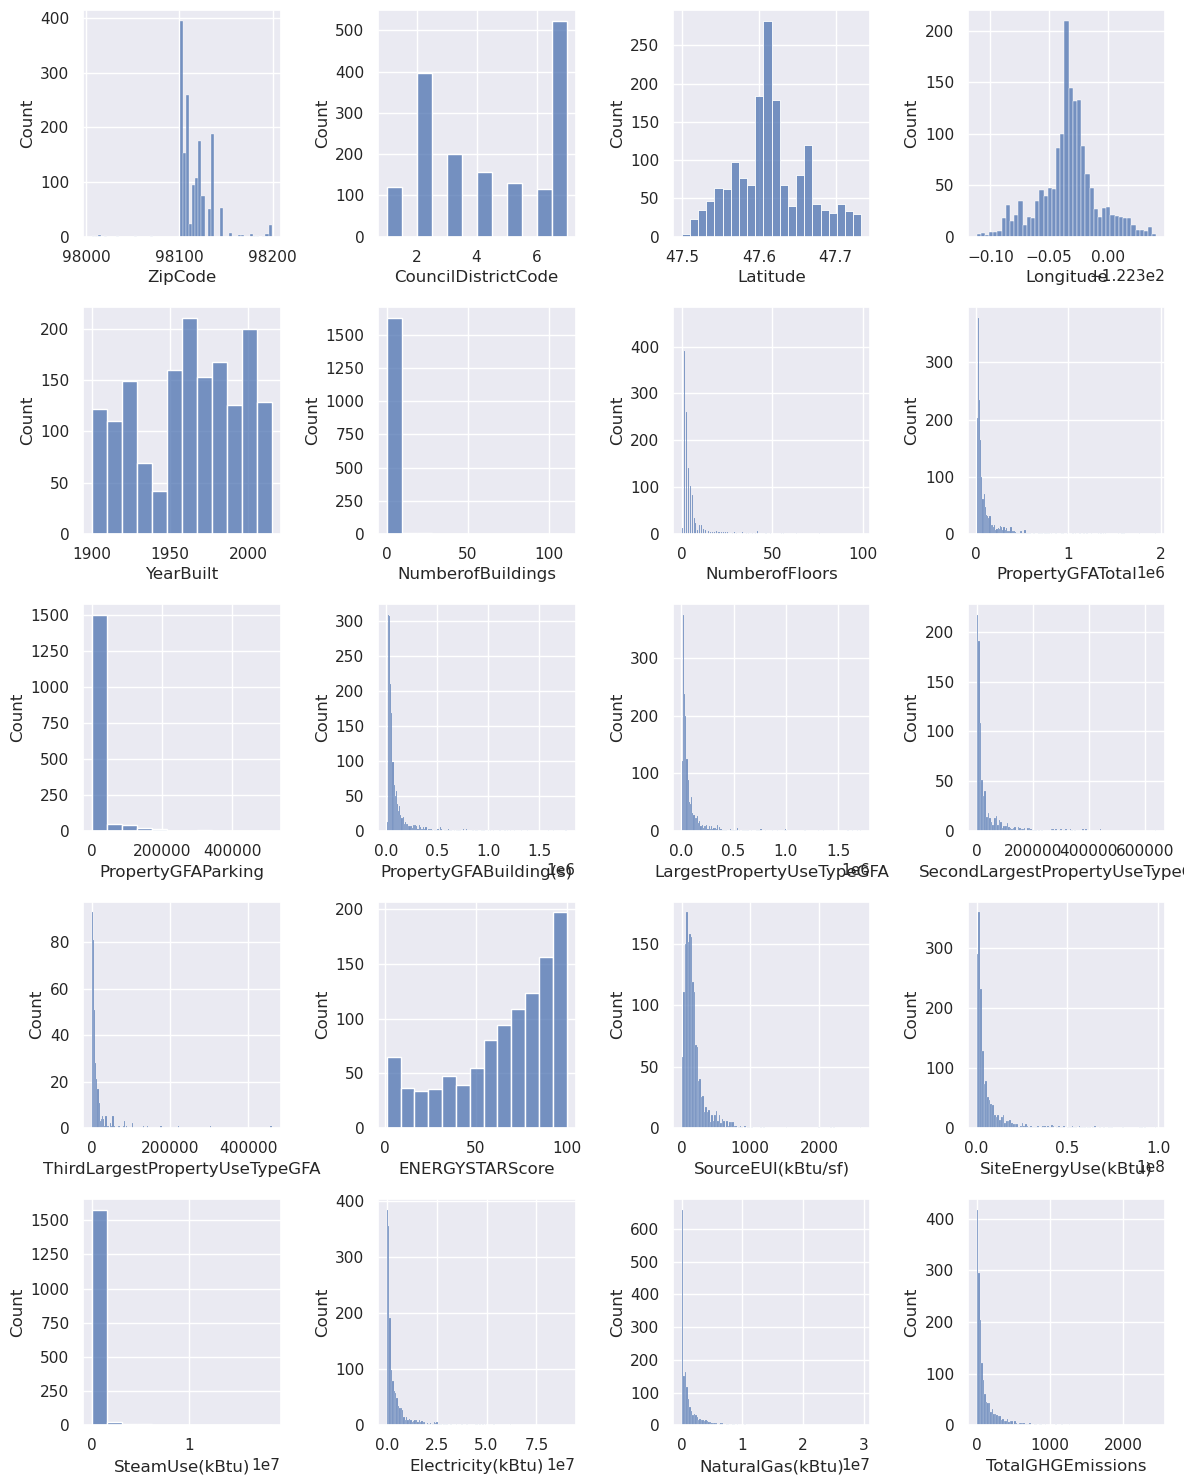

In [64]:
fig, axe = plt.subplots(5,4, figsize=(12,15))
axe = axe.flatten()
for i, feature in enumerate(features):
    sns.histplot(x=feature, data=data, ax=axe[i])
plt.tight_layout()
plt.show()

Les distributions sont déjà mieux lisibles.

## 1.4. VALEURS MANQUANTES.

Affichons le taux de valeurs manquantes de chacune de nos variables :

In [65]:
mt.valeurs_manquantes(data)

,effectif,taux
BuildingType,0,0.0
PrimaryPropertyType,0,0.0
PropertyName,0,0.0
Address,0,0.0
ZipCode,16,1.0
TaxParcelIdentificationNumber,0,0.0
CouncilDistrictCode,0,0.0
Neighborhood,0,0.0
Latitude,0,0.0
Longitude,0,0.0


### 1.4.1 LES ENERGIES

La variable **Electricity(kBtu)** possède quatre valeurs manquantes, complétons-les si possible à l'aide des valeurs des autres sources d'énergies présentes. Il va simplement falloir s'assurer que la valeur finale n'est pas négative :

In [66]:
data[data['Electricity(kBtu)'].isna()]

,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,...,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
700,NonResidential,Supermarket / Grocery Store,IUC- Whole Foods Interbay,2001 15th Avenue West,98119.0,7666201460,7,MAGNOLIA / QUEEN ANNE,47.63718,-122.37734,...,5500.0,31.0,0.0,1.252517e+07,0.0,NaN,NaN,False,Compliant,NaN
773,NonResidential,Small- and Mid-Sized Office,SEATTLE BUILDING,215 COLUMBIA ST,98104.0,0939000245,7,DOWNTOWN,47.60380,-122.33293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN
26532,NonResidential,Mixed Use Property,KALBERG BUILDING,4515 UNIVERSITY WAY NE,98105.0,8816401120,4,NORTHEAST,47.66182,-122.31345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN
49784,NonResidential,Small- and Mid-Sized Office,Bullitt Center,1501 E. Madison St.,98122.0,7234600195,3,CENTRAL,47.61432,-122.31257,...,NaN,100.0,2.0,3.427261e+05,0.0,NaN,0.0,False,Compliant,NaN


On peut voir que deux de ces valeurs manquantes correspondent à des bâtiments qui n'ont aucun relevé energétique ni taux d'émission de CO2 indiqué. Ces lignes sont donc inutiles, supprimons les :

In [67]:
data.drop(index=[773,26532], inplace=True)

Pour une des deux valeurs restantes, on peut voir que les valeurs correspondantes de SteamUse et NaturalGas sont nulles, par conséquent on peut estimer que la valeur manquante dans Electricity est égale à celle de SiteEnergyUse :

In [68]:
data.loc[49784, 'Electricity(kBtu)'] = data.loc[49784,'SiteEnergyUse(kBtu)']

Pour la dernière, nous allons l'imputer par la médiane des propriétés de même type :

In [69]:
condition = (data.PrimaryPropertyType == 'Supermarket / Grocery Store')
data.loc[700, 'Electricity(kBtu)'] = data.loc[condition, 'Electricity(kBtu)'].median()

In [70]:
data[data['Electricity(kBtu)'].isna()].shape[0]

0

La variable **NaturalGas(kBtu)** n'a plus qu'une seule valeur manquante. Comme la valeur correspondante de *SteamUse(kBtu)* est nulle, nous allons l'imputer par la différence entre l'électricité et l'énergie totale consommée :

In [71]:
data.loc[700, 'NaturalGas(kBtu)'] = data.loc[700,'SiteEnergyUse(kBtu)'] - data.loc[700, 'Electricity(kBtu)']

In [72]:
data.loc[700, 'NaturalGas(kBtu)']

6159859.0

In [73]:
data[data['NaturalGas(kBtu)'].isna()].shape[0]

0

### 1.4.2 TOTALGHGEMISSIONS

On peut voir aussi que les lignes précédentes contenaient toutes les valeurs manquantes des variables énergétiques et de **TotalGHGEmissions**.

En utilisant le facteur de calcul de la quantité d'émissions de CO2 décrit dans la partie précédente, on peut calculer la valeur manquante de la ligne 49784 à partir de la quantité d'électricité consommée (seule valeur énergétique présente sur la ligne):

In [74]:
data.loc[49784,'TotalGHGEmissions'] = a*data.loc[49784,'Electricity(kBtu)']

In [75]:
data.loc[49784,'TotalGHGEmissions']

2.3891669052541777

De même pour la ligne 700 (La valeur de *SteamUse(kBtu)* est nulle) :

In [76]:
data.loc[700,'TotalGHGEmissions'] = a*data.loc[700,'Electricity(kBtu)'] + c*data.loc[700,'NaturalGas(kBtu)']

In [77]:
data.TotalGHGEmissions

OSEBuildingID
1         249.98
2         295.86
3        2089.28
5         286.43
8         505.01
          ...   
50222      20.94
50223      32.17
50224     223.54
50225      22.11
50226      41.27
Name: TotalGHGEmissions, Length: 1637, dtype: float64

Les valeurs de TotalGHGEmissions sont arrondies au centième (à 10 kg près) :

In [78]:
data.TotalGHGEmissions = data.TotalGHGEmissions.round(2)

In [79]:
data[data.TotalGHGEmissions.isna()].shape[0]

0

### 1.4.3 LES PROPERTY USE TYPES

Regardons maintenant les valeurs manquantes de **ListOfAllPropertyUseTypes** :

In [80]:
data.loc[data.ListOfAllPropertyUseTypes.isna(), ['PrimaryPropertyType', 'PropertyName',
                                                    'LargestPropertyUseType', 'SecondLargestPropertyUseType',
                                                    'ThirdLargestPropertyUseType']]

,PrimaryPropertyType,PropertyName,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
OSEBuildingID,,,,,


Il n'y en a plus aucune. Interessons-nous maintenant aux quatre valeurs manquantes de **LargestPropertyUseType** :

In [81]:
data.loc[data.LargestPropertyUseType.isna(), ['PrimaryPropertyType', 'PropertyName', 
                                              'ListOfAllPropertyUseTypes', 'SecondLargestPropertyUseType',
                                              'ThirdLargestPropertyUseType']]

,PrimaryPropertyType,PropertyName,ListOfAllPropertyUseTypes,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
OSEBuildingID,,,,,
496,Self-Storage Facility,Market St Center,"Fitness Center/Health Club/Gym, Office, Other ...",NaN,NaN
21103,Hotel,Palladian Hotel,Hotel,NaN,NaN
25568,Small- and Mid-Sized Office,Talon Northlake LLC,Office,NaN,NaN
25711,Restaurant,BUSH GARDEN - RESTURANT & LOUNGE,Restaurant,NaN,NaN


Trois de ces valeurs manquantes sont présentes sans ambiguïté dans la variable *ListOfAllPropertyUseTypes*. Nous allons donc pouvoir les compléter :

In [82]:
index = [21103, 25568, 25711]
data.loc[index, 'LargestPropertyUseType'] = data.loc[index, 'ListOfAllPropertyUseTypes']

Pour la quatrième valeur manquante, regardons l'usage principal des propriétés de même type :

In [83]:
condition = ((data.PrimaryPropertyType == 'Self-Storage Facility'))
data.loc[condition, 'LargestPropertyUseType']

OSEBuildingID
41       Self-Storage Facility
55       Self-Storage Facility
209      Self-Storage Facility
230      Self-Storage Facility
369      Self-Storage Facility
496                        NaN
533      Self-Storage Facility
536      Self-Storage Facility
20614    Self-Storage Facility
20686    Self-Storage Facility
21095    Self-Storage Facility
21913    Self-Storage Facility
22547    Self-Storage Facility
22548    Self-Storage Facility
22679    Self-Storage Facility
23020    Self-Storage Facility
23936    Self-Storage Facility
24026    Self-Storage Facility
24070    Self-Storage Facility
24593    Self-Storage Facility
24758    Self-Storage Facility
24876    Self-Storage Facility
25001    Self-Storage Facility
25002    Self-Storage Facility
25364    Self-Storage Facility
25537    Self-Storage Facility
26040    Self-Storage Facility
49998    Self-Storage Facility
Name: LargestPropertyUseType, dtype: object

Leur usage principal est identique : *Self-Storage Facility*. Nous allons donc pouvoir compléter cette dernière valeur manquante :

In [84]:
data.loc[496, 'LargestPropertyUseType'] = 'Self-Storage Facility'

In [85]:
data[data.LargestPropertyUseType.isna()].shape[0]

0

Nous devons aussi compléter les valeurs manquantes correspondantes de **LargestPropertyUseTypeGFA** (Il s'agit des même propriétés). Nous allons les imputer par la médiane des valeurs des propriétés qui ont le même usage principal :

In [86]:
indexs = [496, 21103, 25568, 25711]
usages = ['Self-Storage Facility', 'Hotel', 'Office', 'Restaurant']

for index, usage in zip(indexs, usages):
    condition = (data.LargestPropertyUseType == usage)
    data.loc[index,'LargestPropertyUseTypeGFA'] = data.loc[condition, 'LargestPropertyUseTypeGFA'].median()

In [87]:
data[data.LargestPropertyUseTypeGFA.isna()].shape[0]

0

Traitons maintenant les valeurs manquantes de **SecondLargestPropertyUseType** et des surfaces correspondantes. Nous allons afficher toutes les propriétés qui n'ont pas d'usage second mentionné mais qui ont plusieurs usages :

In [88]:
condition = (data.SecondLargestPropertyUseType.isna() & (data.ListOfAllPropertyUseTypes != data.LargestPropertyUseType))
data.loc[condition,['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType']]

,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType
OSEBuildingID,,,
496,"Fitness Center/Health Club/Gym, Office, Other ...",Self-Storage Facility,NaN


Il n'y en qu'une seule. Le problème ici est que l'usage premier n'est pas mentionné dans la liste de tous les usages. On va donc regarder les seconds usages des propriétés qui ont le même usage premier :

In [89]:
condition = (data.LargestPropertyUseType == 'Self-Storage Facility')
data.loc[condition, 'SecondLargestPropertyUseType']

OSEBuildingID
41                     NaN
55       Vocational School
209                    NaN
230                    NaN
369                    NaN
496                    NaN
533                Parking
536                    NaN
20614                  NaN
20686                  NaN
21095                  NaN
21913                  NaN
22547                  NaN
22548                  NaN
22679                  NaN
23020               Office
23936                  NaN
24026                  NaN
24070                  NaN
24593                  NaN
24758              Parking
24876                  NaN
25001                  NaN
25002                  NaN
25364                  NaN
25537                  NaN
26040                  NaN
49998                  NaN
Name: SecondLargestPropertyUseType, dtype: object

On voit que presque toutes ces propriétés n'ont pas d'usage second. Néanmoins, il y en a une dont l'usage second est 'Office', usage qui figure dans la liste de tous les usages de la propriété qui nous intéresse ici. Nous allons donc compléter notre valeur manquante par 'Office' :

In [90]:
data.loc[496, 'SecondLargestPropertyUseType'] = 'Office'

Complétons la surface correspondante par la mediane des surfaces de même second usage :

In [91]:
condition = (data.SecondLargestPropertyUseType == 'Office')
data.loc[496, 'SecondLargestPropertyUseTypeGFA'] = data.loc[condition, 'SecondLargestPropertyUseTypeGFA'].median()

Toutes les autres propriétés qui n'ont pas d'usage second mentionné n'ont tout simplement qu'un seul usage. On va donc pouvoir compléter compléter toutes les valeurs manquantes restantes par 'None' et les surfaces correspondantes par 0 :

In [92]:
condition = data.SecondLargestPropertyUseType.isna()
data.loc[condition, 'SecondLargestPropertyUseType'] = 'None'
data.loc[condition, 'SecondLargestPropertyUseTypeGFA'] = 0

In [93]:
data[data.SecondLargestPropertyUseType.isna()].shape[0]

0

In [94]:
data[data.SecondLargestPropertyUseTypeGFA.isna()].shape[0]

0

Reste les valeurs manquantes de **ThirdLargestPropertyUseType** et surfaces correspondantes à traiter :

In [95]:
condition = data.ThirdLargestPropertyUseType.isna()
data.loc[condition,['ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType']].head(30)

,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType
OSEBuildingID,,,
1,Hotel,Hotel,None
3,Hotel,Hotel,None
5,Hotel,Hotel,None
9,Police Station,Police Station,None
10,Hotel,Hotel,None
11,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,None
12,Hotel,Hotel,None
15,Hotel,Hotel,None
16,Hotel,Hotel,None


La variable *ThirdLargestPropertyUseType* a un taux élevé de valeurs manquantes et il devient difficile de vérifier pour chaque propriété s'il n'y a réellement pas de troisième usage mentionné dans la liste de tous les usages. C'est bien le cas en tout cas pour les 30 premières propriétés.

On va donc supposer que ces valeurs sont manquantes car ces propriétés n'ont pas de troisième usage. On va donc les compléter par 'None' et les surfaces correspondantes par 0 :

In [96]:
condition = data.ThirdLargestPropertyUseType.isna()
data.loc[condition, 'ThirdLargestPropertyUseType'] = 'None'
data.loc[condition, 'ThirdLargestPropertyUseTypeGFA'] = 0

In [97]:
data[data.ThirdLargestPropertyUseType.isna()].shape[0]

0

In [98]:
data[data.ThirdLargestPropertyUseTypeGFA.isna()].shape[0]

0

### 1.4.4 ENERGYSTARSCORE

Pour la variable **ENERGYSTARScore**, nous allons imputer ses valeurs manquantes par la médiane des valeurs des bâtiments de même type et même usage principal, lorsque cela est possible :

In [99]:
indexs = data[data.ENERGYSTARScore.isna()].index

for index in indexs:
    condition = ((data.PrimaryPropertyType == data.loc[index,'PrimaryPropertyType']) & \
                 (data.LargestPropertyUseType == data.loc[index,'LargestPropertyUseType']))
    data.loc[index,'ENERGYSTARScore'] = data.loc[condition,'ENERGYSTARScore'].median()

In [100]:
data[data.ENERGYSTARScore.isna()].shape[0]

347

Il reste encore des valeurs manquantes. Imputons-les par la médiane de celles qui ont uniquement le même usage :

In [101]:
indexs = data[data.ENERGYSTARScore.isna()].index

for index in indexs:
    condition = (data.LargestPropertyUseType == data.loc[index,'LargestPropertyUseType'])
    data.loc[index,'ENERGYSTARScore'] = data.loc[condition,'ENERGYSTARScore'].median()

In [102]:
data[data.ENERGYSTARScore.isna()].shape[0]

229

Il reste encore et toujours des valeurs manquantes. Imputons-les par la médiane de celles qui ont uniquement le même type :

In [103]:
indexs = data[data.ENERGYSTARScore.isna()].index

for index in indexs:
    condition = (data.PrimaryPropertyType == data.loc[index,'PrimaryPropertyType'])
    data.loc[index,'ENERGYSTARScore'] = data.loc[condition,'ENERGYSTARScore'].median()

In [104]:
data[data.ENERGYSTARScore.isna()].shape[0]

74

Ce n'est toujours pas fini. Imputons les valeurs manquantes restantes par la médiane des autres valeurs :

In [105]:
data.loc[data.ENERGYSTARScore.isna(),'ENERGYSTARScore'] = data.ENERGYSTARScore.median()

In [106]:
data[data.ENERGYSTARScore.isna()].shape[0]

0

In [107]:
data.ENERGYSTARScore.nunique()

102

Voilà, c'est enfin terminé ! Les valeurs de **ENERGYSTARScore** doivent être entières donc arrondissons-les à l'unité :

In [108]:
data.ENERGYSTARScore = data.ENERGYSTARScore.round()

In [109]:
data.ENERGYSTARScore.nunique()

100

### 1.4.5 ZIPCODE

In [110]:
data.loc[data.ZipCode.isna(), ['Address']]

,Address
OSEBuildingID,
50196,10510 5th Ave NE
50198,405 MLK Jr Way S
50201,8729 15th Ave NW
50204,2806 NE 127th St
50207,6020 28th ave NW
50208,1471 NW 67th St
50210,1403 w howe
50212,1400 E Galer St
50219,2323 East Cherry St


Il n'y a que 16 codes postaux manquants, on peut les retrouver à partir des adresses à l'aide de *GoogleMaps* :

In [111]:
zip_codes = [98125, 98144, 98117, 98125, 98107, 98117, 98119, 98112, 98122, 98118, 98126, 98108, 98104, 98119, 98108, 98108]
data.loc[data.ZipCode.isna(), 'ZipCode'] = zip_codes

In [112]:
data[data.ZipCode.isna()].shape[0]

0

Affichons à nouveau les taux de valeurs manquantes de chacune des variables :

In [113]:
mt.valeurs_manquantes(data)

,effectif,taux
BuildingType,0,0.0
PrimaryPropertyType,0,0.0
PropertyName,0,0.0
Address,0,0.0
ZipCode,0,0.0
TaxParcelIdentificationNumber,0,0.0
CouncilDistrictCode,0,0.0
Neighborhood,0,0.0
Latitude,0,0.0
Longitude,0,0.0


Il n'y a plus de valeurs manquantes, le nettoyage est terminé !

## 1.5. FEATURES ENGINEERING.

### 1.5.1 ENCODAGE DES VARIABLES CATÉGORIELLES

Commençons par créer une copie de notre dataset sur laquelle nous allons travailler :

In [114]:
new_data = data.copy()

Nous allons exclure certaines variables de notre nouveau dataset :
- La variable **ListOfAllPropertyUseTypes** qui est compliqué à gérer car de type texte et dont l'information est essentiellement déjà donnée par les variables *LargestPropertyUseType*, *SecondLargestPropertyUseType* et *ThirdLargestPropertyUseType* ;
- Les variables **PropertyName** et **Address** sont parfaitement corrélées aux cibles puisqu'elles peuvent quasiment jouer le rôle d'identifiants des propriétés : lors de l'entraînement d'un modèle d'apprentissage, la connaissance du nom de la propriété ou de l'adresse permet donc de connaître exactement la quantité de CO2 émise ou la quantité totale d'énergie consommée. Inclure ces variables dans le dataset posera donc un problème lors du test du modèle, qui peut alors tomber sur des noms de propriétés ou des adresses qu'il n'a pas rencontré lors de son entraînement : Il y a un fort risque de *sur-apprentissage*. Même constat, mais dans une moindre mesure, avec la variable **TaxParcelIdentificationNumber** ;
- Les variables **DefaultData** et **ComplianceStatus** qui contiennent des informations qui ne seront pas disponibles pour les futurs bâtiments dont on cherchera à prédire la quantité de CO2 émise ou l'énergie totale consommée ;
- La variable **ENERGYSTARScore** dont on cherchera plus tard à évaluer le caractère prédictif pour les émissions de CO2. Elle est présente dans le dataset initial, ont la réintegrera dans notre nouveau dataset à ce moment-là. 

In [115]:
new_data.drop(columns=['ListOfAllPropertyUseTypes', 'PropertyName', 'Address', 'TaxParcelIdentificationNumber', 
                       'ENERGYSTARScore', 'DefaultData', 'ComplianceStatus'], inplace=True)

In [116]:
new_data.shape

(1637, 25)

In [117]:
new_data.dtypes

BuildingType                        object
PrimaryPropertyType                 object
ZipCode                            float64
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
SourceEUI(kBtu/sf)                 float64
SiteEnergyUse(kBtu)                float64
SteamUse(kBtu)                     float64
Electricity(kBtu)                  float64
NaturalGas(

Nos variables catégorielles sont nominales et non binaires. La difficulté ici va être d'encoder l'ensemble des variables de façon cohérente, de sorte à ce que chaque chaine de caractères est un code unique dans tout le DataFrame indépendamment de la variable dans laquelle elle se trouve. C'est à dire qu'une chaîne présente dans des variables différentes doit avoir le même code, afin de conserver la correspondance naturelle existante entre les variables. Nous n'allons donc pas encoder chaque variable séparemment des autres.

Pour commencer, nous allons créer une liste qui contient toutes les modalités de notre dataset, sans répétitions :

In [118]:
features = ['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType', 
            'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']

L = new_data[features].values.reshape(1,-1)

In [119]:
L = np.unique(L).reshape(1,-1)
L.shape

(1, 95)

In [120]:
L

array([['Adult Education', 'Automobile Dealership', 'BALLARD', 'Ballard',
        'Bank Branch', 'Bar/Nightclub', 'CENTRAL', 'Campus', 'Central',
        'College/University', 'Convenience Store without Gas Station',
        'Courthouse', 'DELRIDGE', 'DELRIDGE NEIGHBORHOODS', 'DOWNTOWN',
        'Data Center', 'Delridge', 'Distribution Center', 'EAST',
        'Enclosed Mall', 'Fast Food Restaurant', 'Financial Office',
        'Fire Station', 'Fitness Center/Health Club/Gym', 'Food Sales',
        'Food Service', 'GREATER DUWAMISH', 'Hospital',
        'Hospital (General Medical & Surgical)', 'Hotel', 'K-12 School',
        'LAKE UNION', 'Laboratory', 'Large Office', 'Library',
        'Lifestyle Center', 'MAGNOLIA / QUEEN ANNE',
        'Manufacturing/Industrial Plant', 'Medical Office',
        'Mixed Use Property', 'Movie Theater', 'Multifamily Housing',
        'Museum', 'NORTH', 'NORTHEAST', 'NORTHWEST',
        'Non-Refrigerated Warehouse', 'NonResidential', 'None',
        'Non

On voit que L est un array contenant une liste. Nous allons donc convertir l'array en liste puis extraire la liste qui s'y trouve :

In [121]:
L = L.tolist()
L = L[0]

Nous pouvons maintenant encoder les modalités. Nous allons utiliser attribuer un numéro à chaque modalité en utilisant le LabelEncoder :

In [122]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
K = encoder.fit_transform(L)

In [123]:
K = K.tolist()

On crée un dictionnaire (mapping) de correspondance entre les modalités et leurs codes :

In [124]:
mapping = dict(zip(L,K))

On encode chaque feature en utilisant le dictionnaire et la fonction map :

In [125]:
for feature in features:
    new_data[feature] = data[feature].map(mapping)

In [126]:
new_data[features].dtypes

BuildingType                    int64
PrimaryPropertyType             int64
Neighborhood                    int64
LargestPropertyUseType          int64
SecondLargestPropertyUseType    int64
ThirdLargestPropertyUseType     int64
dtype: object

Voilà, toutes les variables sont désormais numérisées !

Vérifions par exemple que la chaîne 'None' présente dans les variables *SecondLargestPropertyUseType* et *ThirdLargestPropertyUseType* est encodée de la même manière dans les deux variables :

In [127]:
data.loc[data.SecondLargestPropertyUseType == 'None', ['SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']]

,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
OSEBuildingID,,
1,None,None
3,None,None
5,None,None
9,None,None
10,None,None
...,...,...
50212,None,None
50220,None,None
50221,None,None


In [128]:
new_data.loc[data.SecondLargestPropertyUseType == 'None', ['SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']]

,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
OSEBuildingID,,
1,48,48
3,48,48
5,48,48
9,48,48
10,48,48
...,...,...
50212,48,48
50220,48,48
50221,48,48


### 1.5.2 TRANSFORMATION DES VARIABLES

Commençons par afficher les distributions des variables :

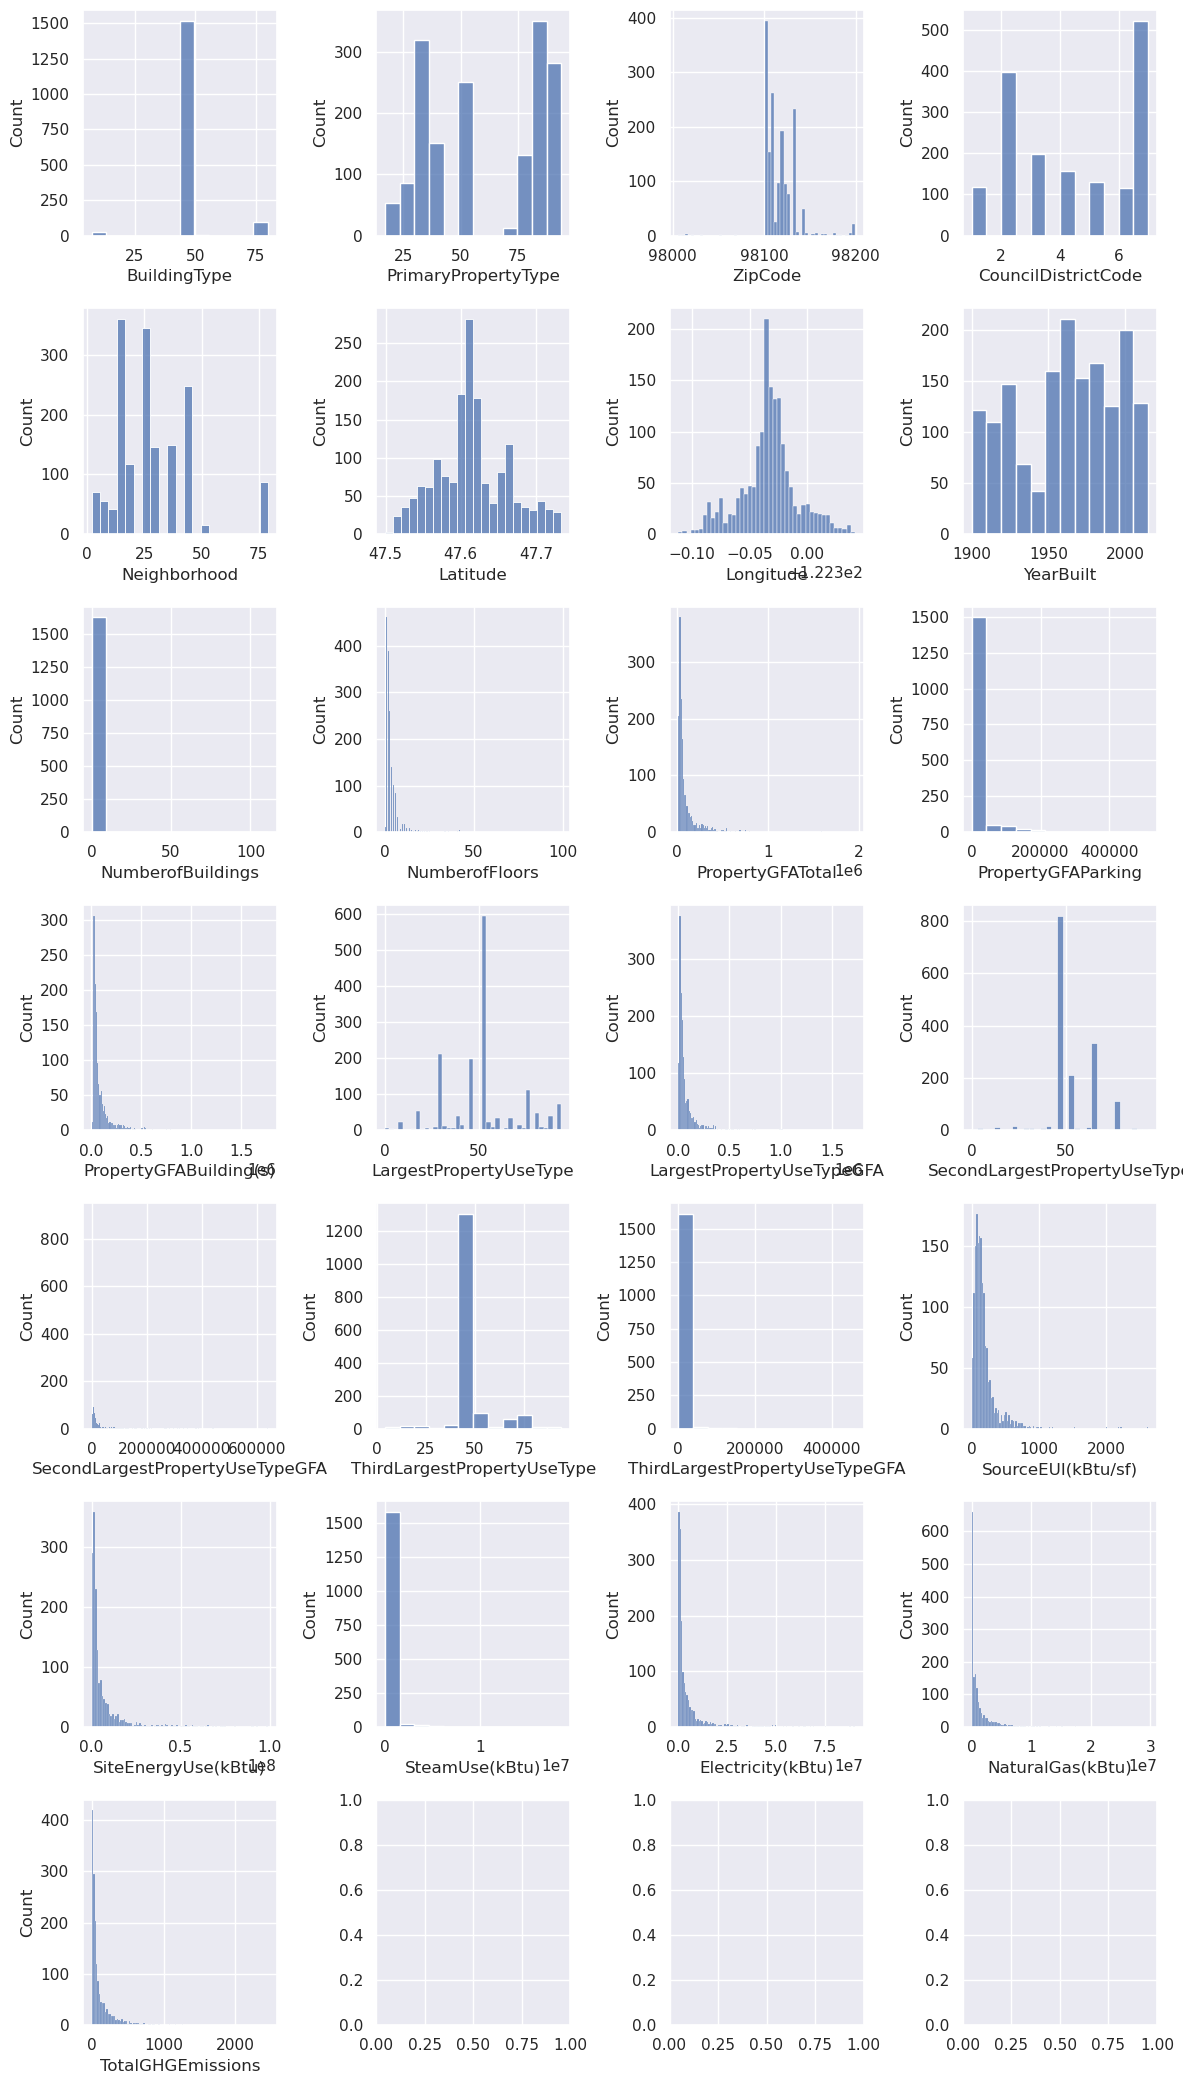

In [129]:
features = new_data.columns
fig, axe = plt.subplots(7,4, figsize=(12,21))
axe = axe.flatten()
for i, feature in enumerate(features):
    sns.histplot(x=feature, data=new_data, ax=axe[i])
plt.tight_layout()
plt.show()

On constate que certaines variables ont des distributions peu lisibles en raison de leur très grande amplitude et de la concentration de leurs valeurs près de 0 (skewness élevé). Cela indique qu'un échelle logarithmique est mieux adaptée pour observer ces distributions. Nous allons donc transformer ces variables en y appliquant le log :

In [130]:
features = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 
            'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'SourceEUI(kBtu/sf)', 
            'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions'] 

new_data[features] = np.log(data[features]+1) # Les valeurs sont positives et +1 pour éviter un log de 0.

Affichons les distributions des variables transformées :

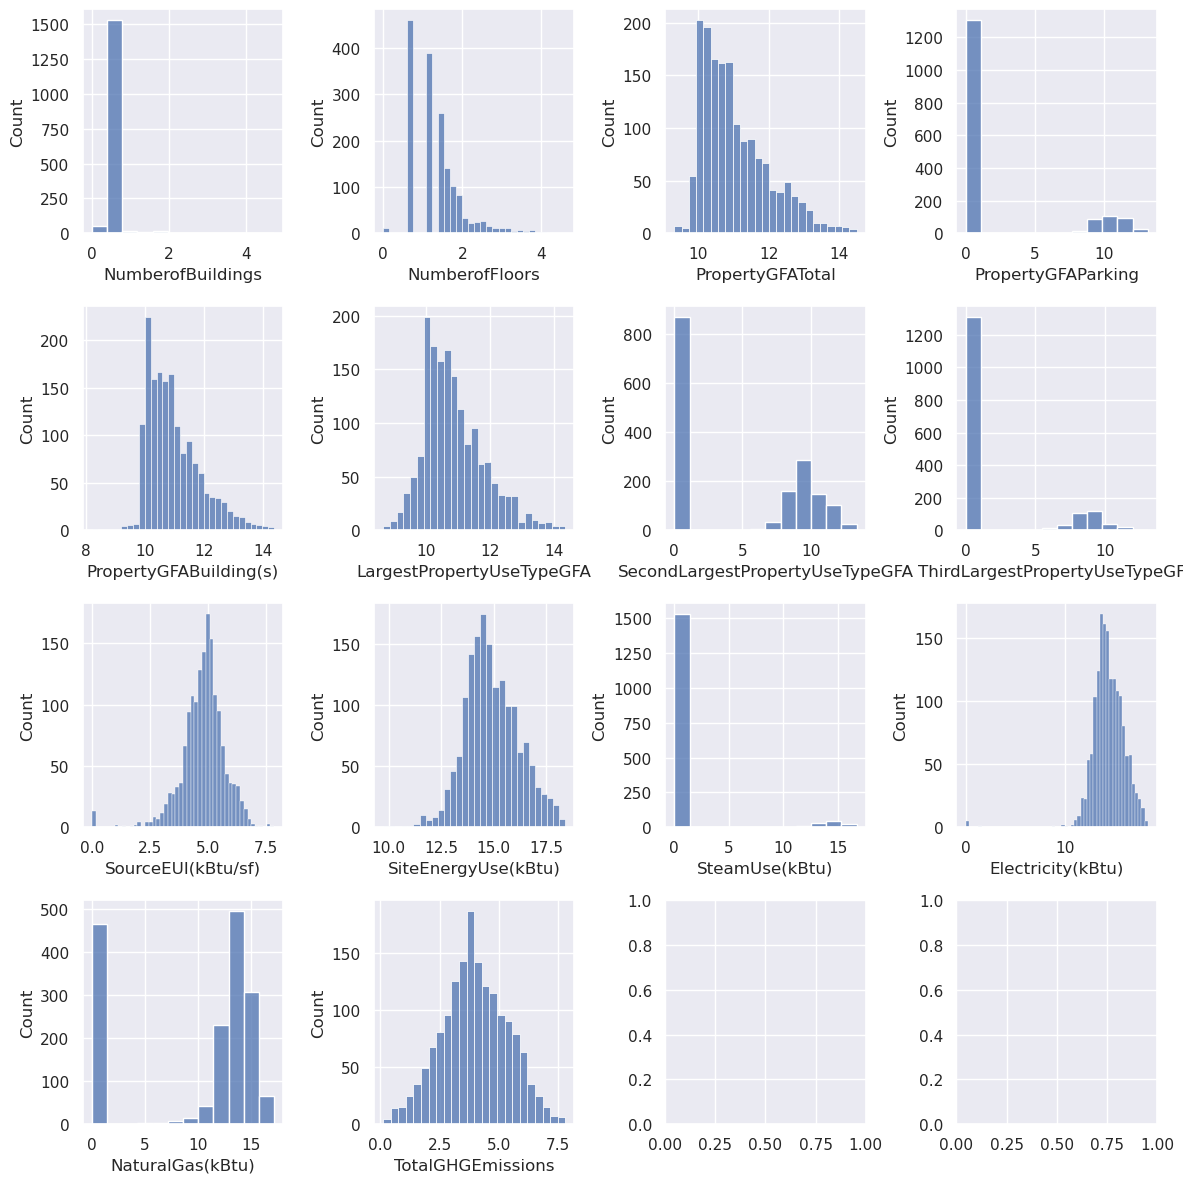

In [131]:
fig, axe = plt.subplots(4,4, figsize=(12,12))
axe = axe.flatten()
for i, feature in enumerate(features):
    sns.histplot(x=feature, data=new_data, ax=axe[i])
plt.tight_layout()
plt.show()

Les distributions sont maintenant bien lisibles, plus "normalisées" et l'amplitude des variables est raisonnable.

Nous pouvons maintenant créer un premier dataset d'apprentissage. Le but est d'entraîner un modèle d'apprentissage supervisé afin qu'il puisse prédire la quantité de CO2 émise et la consommation totale d'énergie pour des propriétés pour lesquelles nous ne disposerons pas de relevés énergétiques (fastidieux et coûteux à établir). On doit donc éviter d'introduire telles quelles les variables énergétiques dans notre dataset d'apprentissage afin d'éviter toute fuite de données (data leakage) et les prédictions doivent donc essentiellement être basées sur les données structurelles des bâtiments qui seront elles toujours disponibles (Type de propriété, principaux usages, année de construction, localisation, surface, etc).

Pour ce premier dataset nommé 'data_light', nous suivons une approche simple et naïve : Nous en excluons tout simplement les variables énergétiques. Nous entraînerons sur ce dataset des modèles linéaires et évaluerons leurs performances, ce qui nous permettra d'établir un *benchmark* pour des modèles entraînés sur un dataset mieux élaboré.

Exportons ce dataset dans un fichier .csv ainsi que le dataset initial nettoyé :

In [132]:
features = ['SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions']

data_light = new_data.drop(columns=features)
data_light.to_csv('data_light.csv', index=False)

data.to_csv('data_initial.csv', index=False)

### 1.5.3 CRÉATION DE NOUVELLES VARIABLES

Dans cette partie, nous allons créer de nouvelles variables à partir des variables énergétiques afin d'enrichir notre dataset d'apprentissage. 

Afin d'éviter toute fuite de données (*data leakage*), l'idée est d'extraire des variables énergétiques des informations substantielles que l'on pourra assez facilement retrouver à partir des variables structurelles des bâtiments, qui elles seront toujours disponibles.

Nous allons donc chercher des relations, des correspondances entre ces deux types de variables.

#### ÉNERGIE ET SURFACE :

Pour commencer, on peut raisonnablement supposer *à priori* que la quantité de CO2 émise et d'énergie consommée par une propriété et fortement corrélée et croît avec sa surface utile, c'est à dire la surface utilisée pour ses principaux usages et qui nécessite de l'énergie (un parking extérieur non couvert et non éclairé ne consomme pas d'énergie en principe).

Nous allons donc considérer les deux variables *PropertyGFABuilding(s)* et *PropertyGFATotal* et calculer leur coefficients de corrélation de Pearson avec chacune des variables énergétiques. Nous sélectionnerons celle des deux qui est la mieux corrélée :

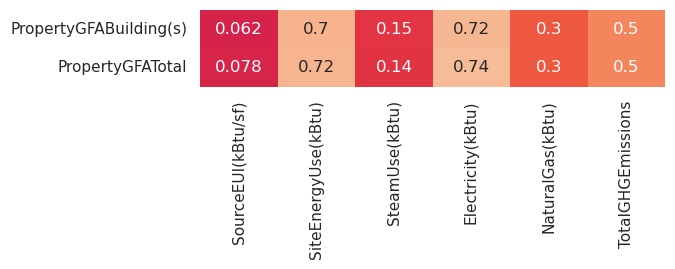

In [133]:
matrice_correlation = (data[['PropertyGFABuilding(s)', 'PropertyGFATotal'] + features].corr()).iloc[:2,2:]

plt.figure(figsize = (6,1))
sns.heatmap(matrice_correlation, vmin=-1, vmax=1, annot=True, cbar=False)
plt.show()

On peut voir que leurs coefficients de corrélation sont assez proches, mais *PropertyGFATotal* est légèrement mieux corrélée aux variables énergétiques. Nous la retenons donc pour la suite.

Nous allons maintenant discrétiser la variable *PropertyGFATotal* en 20 intervalles de même effectif (avec la méthode .qcut() de pandas) et afficher la répartition des valeurs de chaque variable énergétique dans chacun des intervalles (boxplots). Pourquoi 20 intervalles ? Car ce n'est ni trop, ni pas assez pour pouvoir visualiser et analyser les boxplots. Sinon, plus le nombre de classes est important mieux c'est, car le rapport de corrélation $\eta^2$ augmente avec le nombre de classes. Nous expliquerons et illustrerons ce phénomène plus loin.

In [134]:
data['surface'] = pd.qcut(data.PropertyGFATotal, 20)

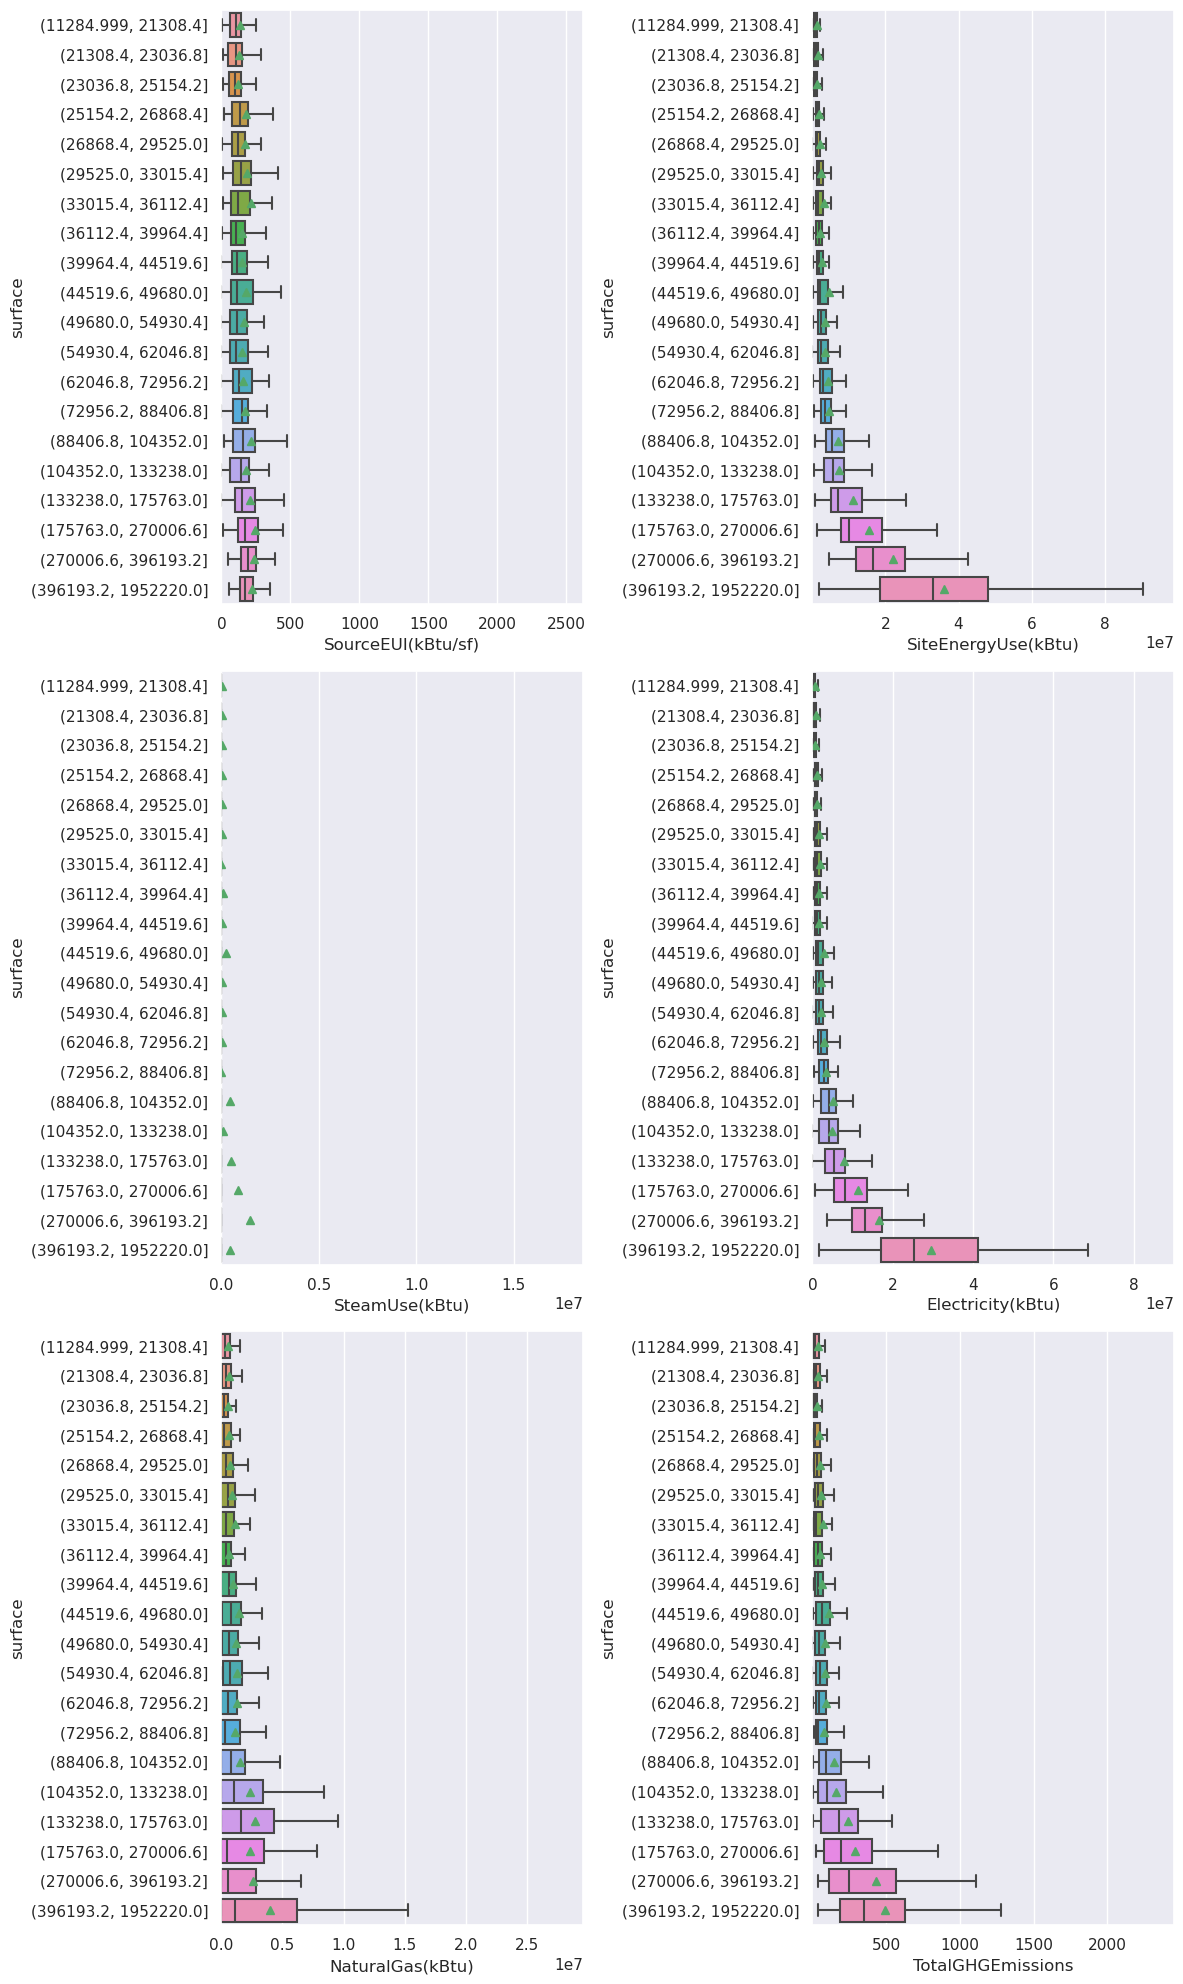

In [135]:
fig, axe = plt.subplots(3,2, figsize=(12,20))
axe = axe.flatten()
for i, feature in enumerate(features):
    sns.boxplot(x=feature, y='surface', data=data, ax=axe[i], showfliers=False, showmeans=True)
    axe[i].set_xlim([data[feature].min(), data[feature].max()])
plt.tight_layout()
plt.show()

On peut faire quelques observations :
- La variable *SteamUse(kBtu)* est la moins utile car on peut raisonnablement l'estimer nulle sans faire d'erreur importante ;
- Pour les autres variables, on peut, pour chaque classe surfacique et à l'exception des quatre ou cinq dernières, assimiler les valeurs énergétiques correspondantes à leur médiane ou leur moyenne avec une erreur négligeable, car les boxplots (sauf les derniers) sont extrêmements resserrés devant l'amplitude de la variable.
- La variable *SourceEUI(kBtu/sf)* n'a pas le problème d'etirement des boxplots sur les dernières classes qu'ont les autres variables : ils semble donc que considérer *l'énergie par unité de surface* permet de régler ce problème.

Nous allons donc pouvoir créer de nouvelles variables en considérant les énergies consommées (totale, électricité, gaz ou vapeur) ou les émissions de CO2 émises, et pour chaque propriété, attribuer la valeur médiane des valeurs qui correspondent à sa classe surfacique.

Ainsi pour toute nouvelle propriété, il sera possible de connaître ses valeurs pour ces nouvelles variables sans avoir à effectué de mesures énergétiques et uniquement à partir de sa surface totale : il suffira d'attribuer la valeur médiane des valeurs qui correspondent à sa classe surfacique. Si sa surface n'appartient à aucune des classes, ce qui est peu probable étant donnée l'étendue importante des surfaces, on pourra par exemple assimiler ses valeurs à la médiane de la première ou de la dernière classe, selon que la nouvelle surface est inférieure à la plus petite surface ou supérieure à la plus grande. Il n'y aura donc aucun problème de data leakage.

Revenons maintenant au choix du nombre optimal de classes surfaciques à considérer. Le nombre optimal est le nombre le plus proche de l'effectif total de la variable n, même si cet effectif est rarement atteint car plusieurs classes non séparables sont regroupées en une seule (elles ont des bornes identiques). En effet, on a par définition $\eta^2 = 1 - \frac{SCR}{SCT}$ où $SCR$ est la variance intraclasse et $SCT$ est la variance totale. S'il n'y a qu'une seule classe, alors toutes les valeurs sont dans la même classe et la variance intraclasse est égale à la variance totale : on a alors $\eta^2 = 0$. Si le nombre de classe est égal à l'effectif total (lorsque c'est possible), chaque classe est un singleton et la variance intra-classe est donc nulle : on a alors $\eta^2 = 1$. Nous allons illustrer cela en affichant l'évolution du $\eta^2$ entre les variables *surface* et *SiteEnergyUse(kBtu)* en fonction du nombre $k$ de classes :

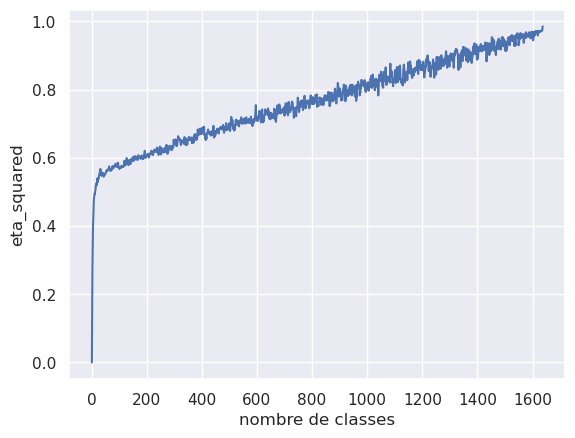

In [136]:
SCT = mt.variance(data['SiteEnergyUse(kBtu)'])            # Calcul de la variance totale.
n = data['SiteEnergyUse(kBtu)'].shape[0]                  # Effectif total de la variable 'SiteEnergyUse(kBtu)'.
eta_squared = []
for k in range(1,n+1):
    data['surface'] = pd.qcut(data.PropertyGFATotal, k, duplicates='drop')     # Discrétisation de la surface totale en k classes
    SCR = (data[['surface', 'SiteEnergyUse(kBtu)']].groupby('surface').agg(mt.variance)).sum()[0]    # Calcul de la variance intra-classes.
    eta_squared.append(1-SCR/SCT)

plt.plot(range(1,n+1), eta_squared)
plt.xlabel('nombre de classes')
plt.ylabel('eta_squared')
plt.show()

In [137]:
data['surface'] = pd.qcut(data.PropertyGFATotal, 1637, duplicates='drop')  # le dataset contient 1637 lignes

In [138]:
data.surface.nunique()

1560

Nous pouvons maintenant créer de nouvelles variables prédictives. Comme le nombre de classes surfaciques est élevé et proche de l'effectif total, presque toutes les classes ne contiennent qu'une seule valeur. Pour ces classes, la médiane se confond avec l'unique valeur de la classe. Il faut donc identifier les quelques classes qui contiennent au moins deux valeurs :

In [139]:
# On dénombre pour chaque variable le nombre de valeurs dans chaque classe surfacique :
denombrement = data[['surface'] + features].groupby('surface').count()

for feature in features:
    new_data[feature] = data[feature]
    classes = denombrement[denombrement[feature] > 1].index   # Pour chaque feature on identifie les classes qui ont plusieurs valeurs.
    for classe in classes:
        new_data.loc[data.surface == classe, feature] = data.loc[data.surface == classe, feature].median() 

new_data[features].nunique()

SourceEUI(kBtu/sf)     1226
SiteEnergyUse(kBtu)    1559
SteamUse(kBtu)          105
Electricity(kBtu)      1550
NaturalGas(kBtu)       1117
TotalGHGEmissions      1500
dtype: int64

Ces nouvelles variables étant par construction fortement corrélées aux variables énergétiques initiales, elles devraient permettre de considérablement améliorer les performances de prédictions des cibles. Affichons leurs distributions pour détecter d'éventuelles anomalies :

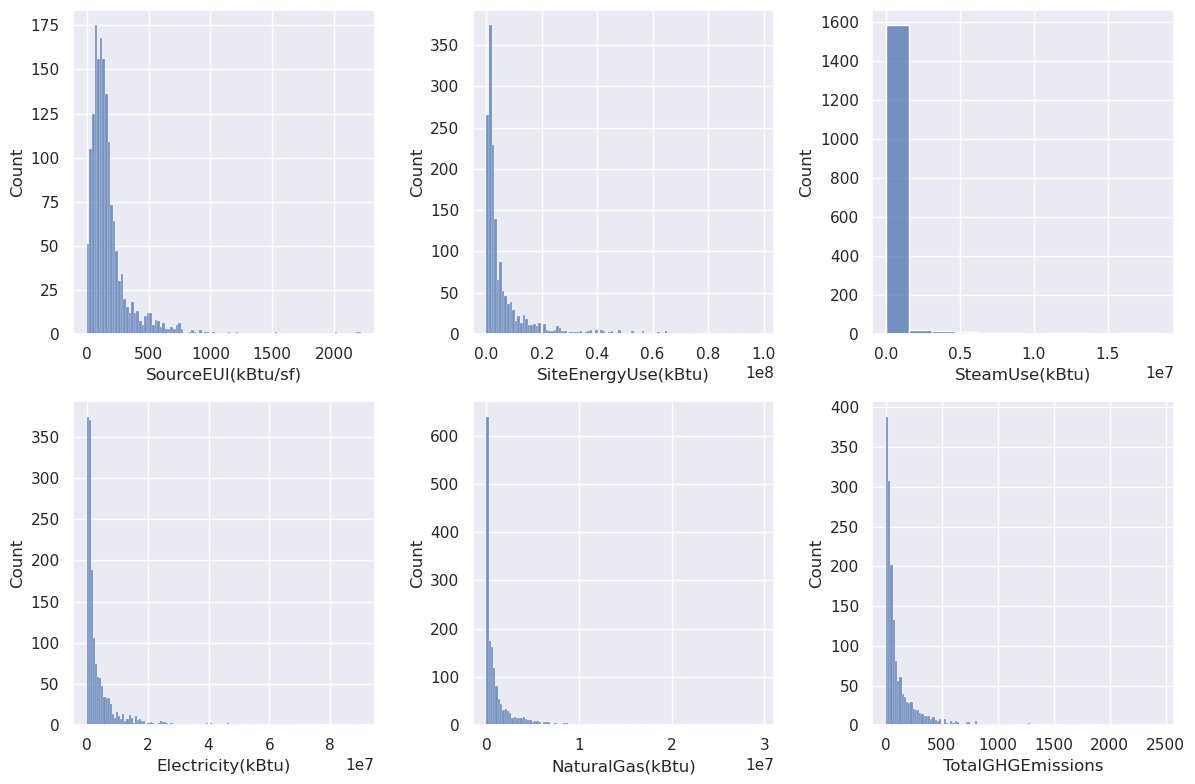

In [140]:
fig, axe = plt.subplots(2,3, figsize=(12,8))
axe = axe.flatten()
for i, feature in enumerate(features):
    sns.histplot(x=feature, data=new_data, ax=axe[i])
plt.tight_layout()
plt.show()

Rien de suspect, si ce n'est que ces variables ont une amplitude et un skewness très élevés comparer aux autres prédicteurs. Nous allons les passer au *log* pour réduire leur amplitude et symétriser leurs distributions :

In [141]:
new_data[features] = np.log(new_data[features]+1)

Affichons à nouveau les distributions :

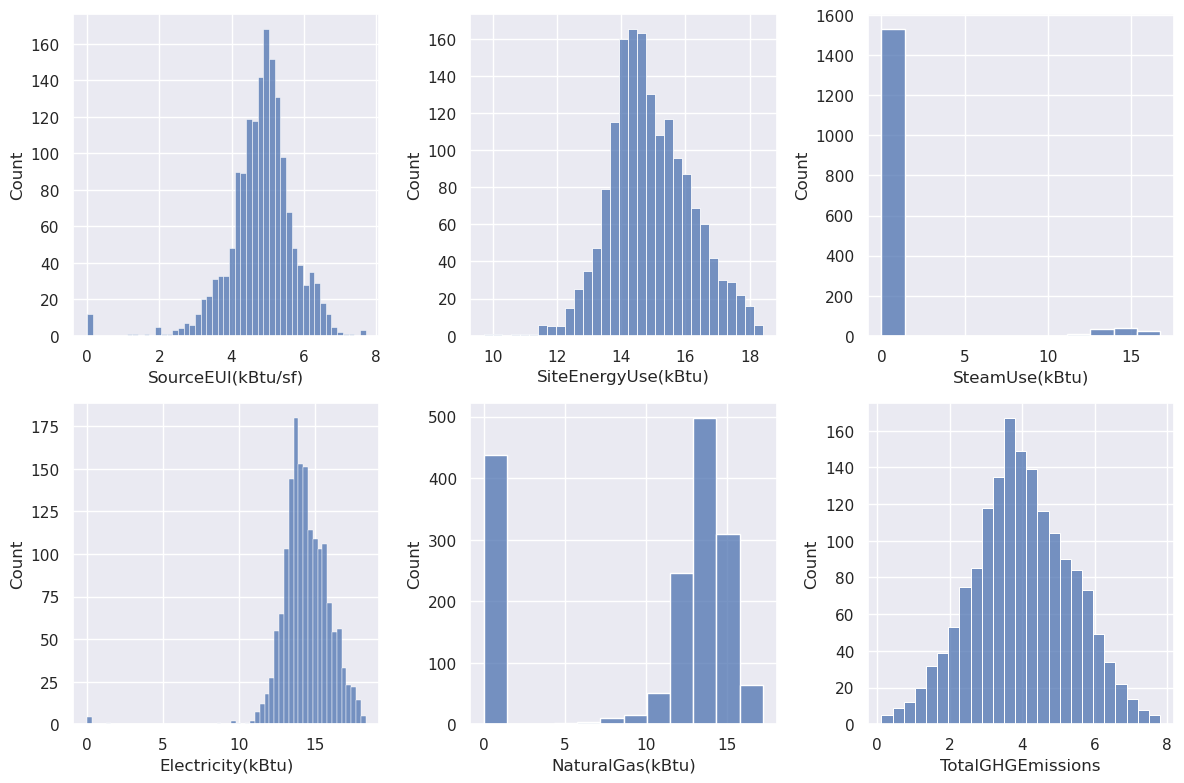

In [142]:
fig, axe = plt.subplots(2,3, figsize=(12,8))
axe = axe.flatten()
for i, feature in enumerate(features):
    sns.histplot(x=feature, data=new_data, ax=axe[i])
plt.tight_layout()
plt.show()

C'est bien mieux ainsi !

On renomme enfin ces nouvelles variables :

In [143]:
new_data.rename(columns={'SourceEUI(kBtu/sf)' : 'source_energy_surface', 
                         'SiteEnergyUse(kBtu)' : 'energy_surface', 
                         'SteamUse(kBtu)' : 'vapeur_surface',
                         'Electricity(kBtu)' : 'electricity_surface', 
                         'NaturalGas(kBtu)' : 'gaz_surface', 
                         'TotalGHGEmissions' : 'emissions_surface'}, inplace=True)

#### ÉNERGIE ET ÉPOQUE DE CONSTRUCTION :

Nous allons faire une analyse similaire entre la variables *YearBuilt* et les variables énergétiques, car on peut raisonnablement supposé qu'il y a un lien entre la date de construction des bâtiments et leurs consommations énergétiques (les matériaux, les méthodes et les règlementations de construction évoluent avec le temps).

Comme précédemment, nous allons discrétiser la variable *YearBuilt* en 20 intervalles de même effectif et afficher la répartition des valeurs de chaque variable énergétique dans chacun des intervalles :

In [144]:
data['epoque'] = pd.qcut(data.YearBuilt, 20)

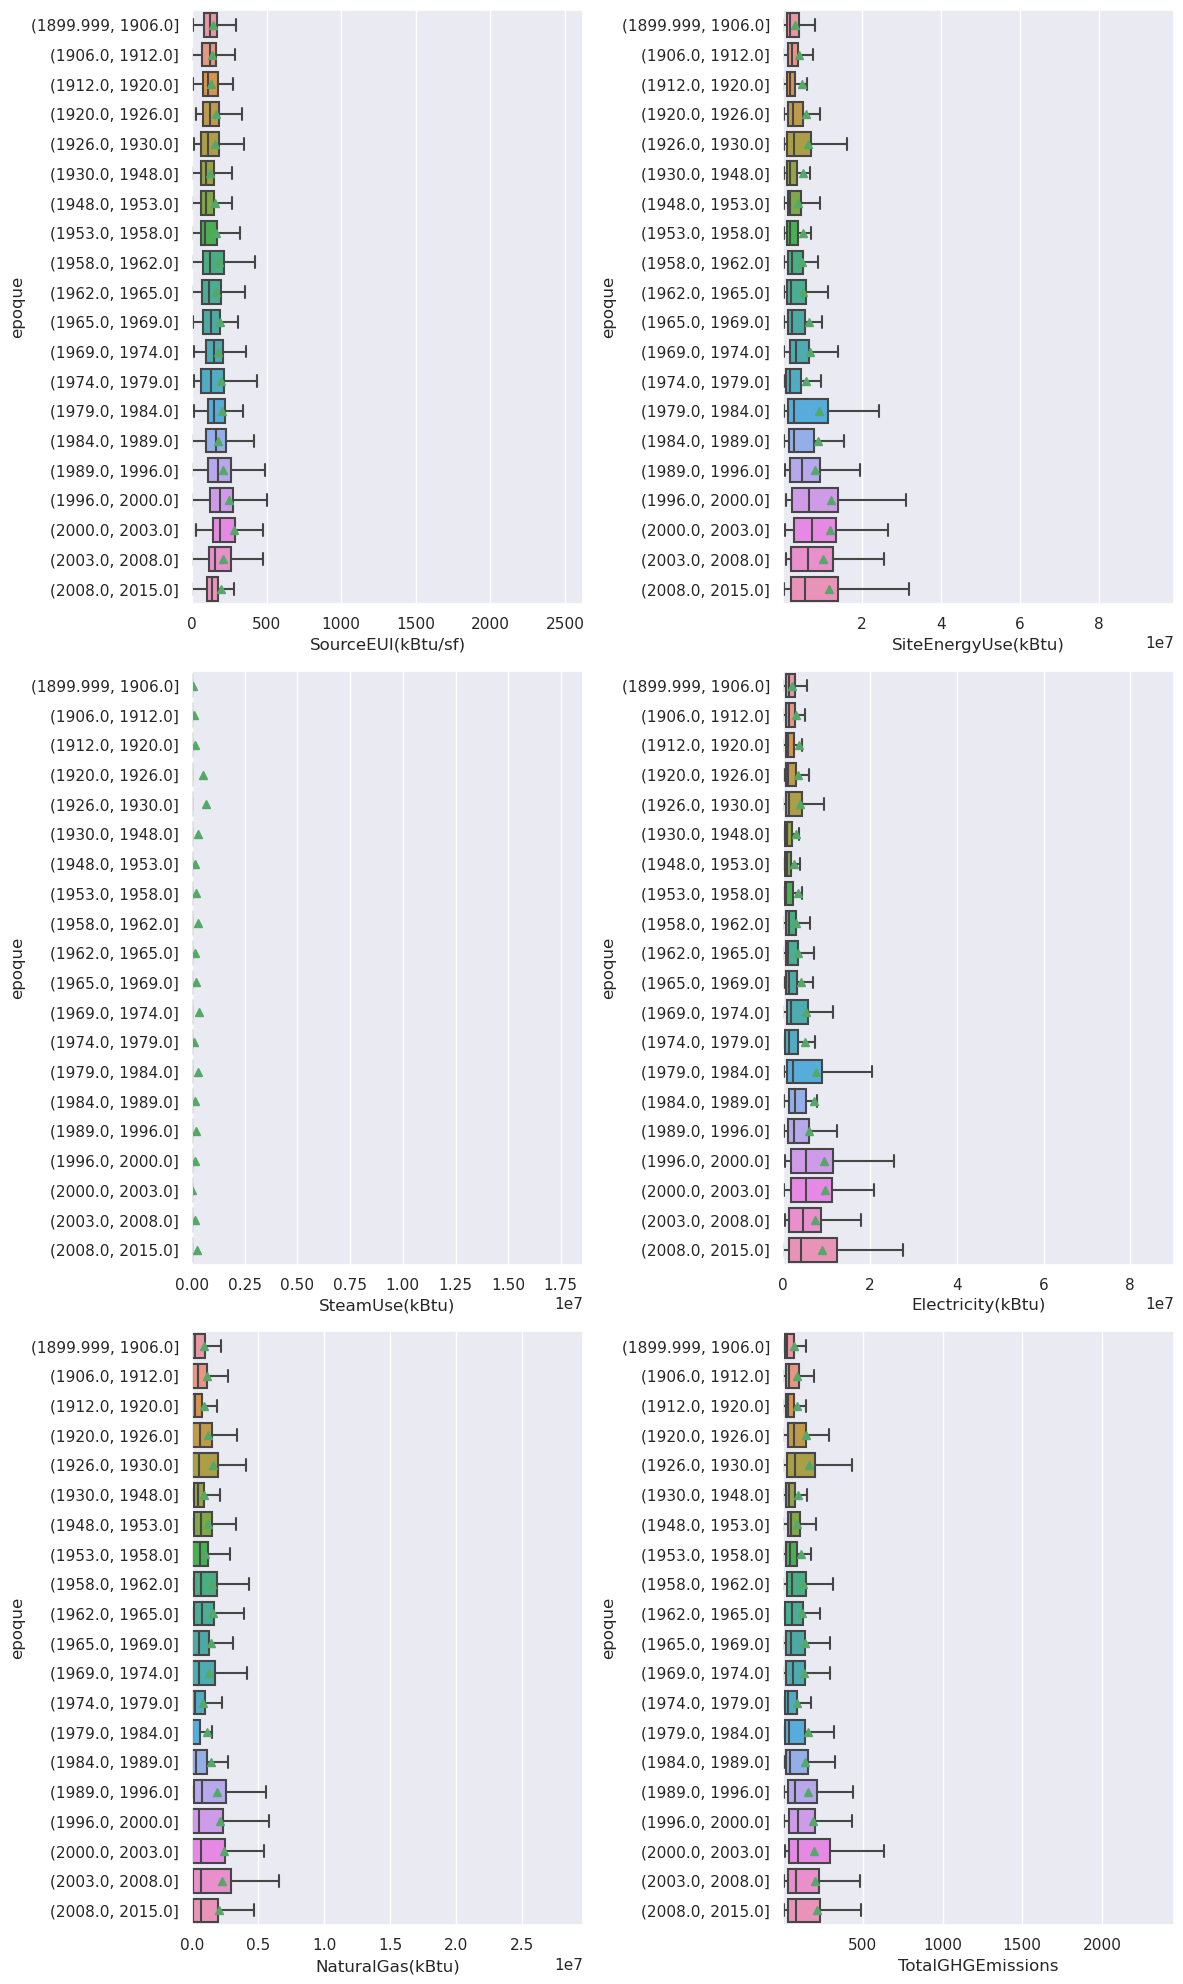

In [145]:
fig, axe = plt.subplots(3,2, figsize=(12,20))
axe = axe.flatten()
for i, feature in enumerate(features):
    sns.boxplot(x=feature, y='epoque', data=data, ax=axe[i], showfliers=False, showmeans=True)
    axe[i].set_xlim([data[feature].min(), data[feature].max()])
plt.tight_layout()
plt.show()

On peut observer une étroite corrélation entre l'année de construction et les variables énergétiques : Les boxplots de chaque classe sont peu étendu devant l'amplitude des variables. On peut donc pour chaque classe raisonnablement assimilé les valeurs des variables à leur médiane ou leur moyenne, sans faire d'erreur majeur.

On peut également faire les constations suivantes :
- À l'exception de la vapeur, les quantités d'énergies consommées ont tendance à croître légèrement avec l'année de construction. Cette tendance s'inverse légérement cependant depuis le début des années 2000. Même constat pour les quantités de CO2 émises ;
- Cette tendance n'est pas dûe au fait que les bâtiments les plus récents auraient une surface globalement plus grande, car la quantité d'énergie consommée par unité de surface suit elle aussi la même tendance.

Comme précédemment avec la surface, nous allons donc pouvoir créer de nouvelles variables en considérant les énergies consommées ou les émissions de CO2 émises, et pour chaque propriété, attribuer la valeur médiane des valeurs qui correspondent à son époque de construction.

Pour toute nouvelle propriété, il sera possible de connaître ses valeurs pour ces nouvelles variables sans avoir à effectué de mesures énergétiques et uniquement à partir de son année de construction : il suffira d'attribuer la valeur médiane des valeurs qui correspondent à son époque de construction. Si elle a été construite après 2015 (ce qui est assez probable cette fois), on assimilera ses valeurs à celles de la classe la plus récente. Il n'y a en tout cas, là encore, aucun problème de data leakage.

Créons maintenant nos nouveaux prédicteurs :

In [146]:
data['epoque'] = pd.qcut(data.YearBuilt, data.YearBuilt.nunique(), duplicates='drop')

In [147]:
data.epoque.nunique()

90

Nous allons directement passer au *log* les nouvelles variables lors de leur création pour les raisons déjà mentionnées :

In [148]:
# On dénombre pour chaque variable le nombre de valeurs dans chaque classe d'époque de construction :
denombrement = data[['epoque'] + features].groupby('epoque').count()

for feature in features:
    new_data[feature] = np.log(data[feature]+1)
    classes = denombrement[denombrement[feature] > 1].index   # Pour chaque feature on identifie les classes qui ont plusieurs valeurs.
    for classe in classes:
        new_data.loc[data.epoque == classe, feature] = np.log(data.loc[data.epoque == classe, feature].median() + 1) 

new_data[features].nunique()

SourceEUI(kBtu/sf)     90
SiteEnergyUse(kBtu)    90
SteamUse(kBtu)          1
Electricity(kBtu)      89
NaturalGas(kBtu)       88
TotalGHGEmissions      90
dtype: int64

La variable *SteamUse(kBtu)* que nous venons de créer dans **new_data** est inutile car elle est constante, supprimons-là :

In [149]:
new_data.drop(columns='SteamUse(kBtu)', inplace=True)

On renomme ces nouvelles variables :

In [150]:
new_data.rename(columns={'SourceEUI(kBtu/sf)' : 'source_energy_epoque', 
                         'SiteEnergyUse(kBtu)' : 'energy_epoque', 
                         'Electricity(kBtu)' : 'electricity_epoque', 
                         'NaturalGas(kBtu)' : 'gaz_epoque', 
                         'TotalGHGEmissions' : 'emissions_epoque'}, inplace=True)

#### ÉNERGIE ET TYPE DE PROPRIÉTÉ :

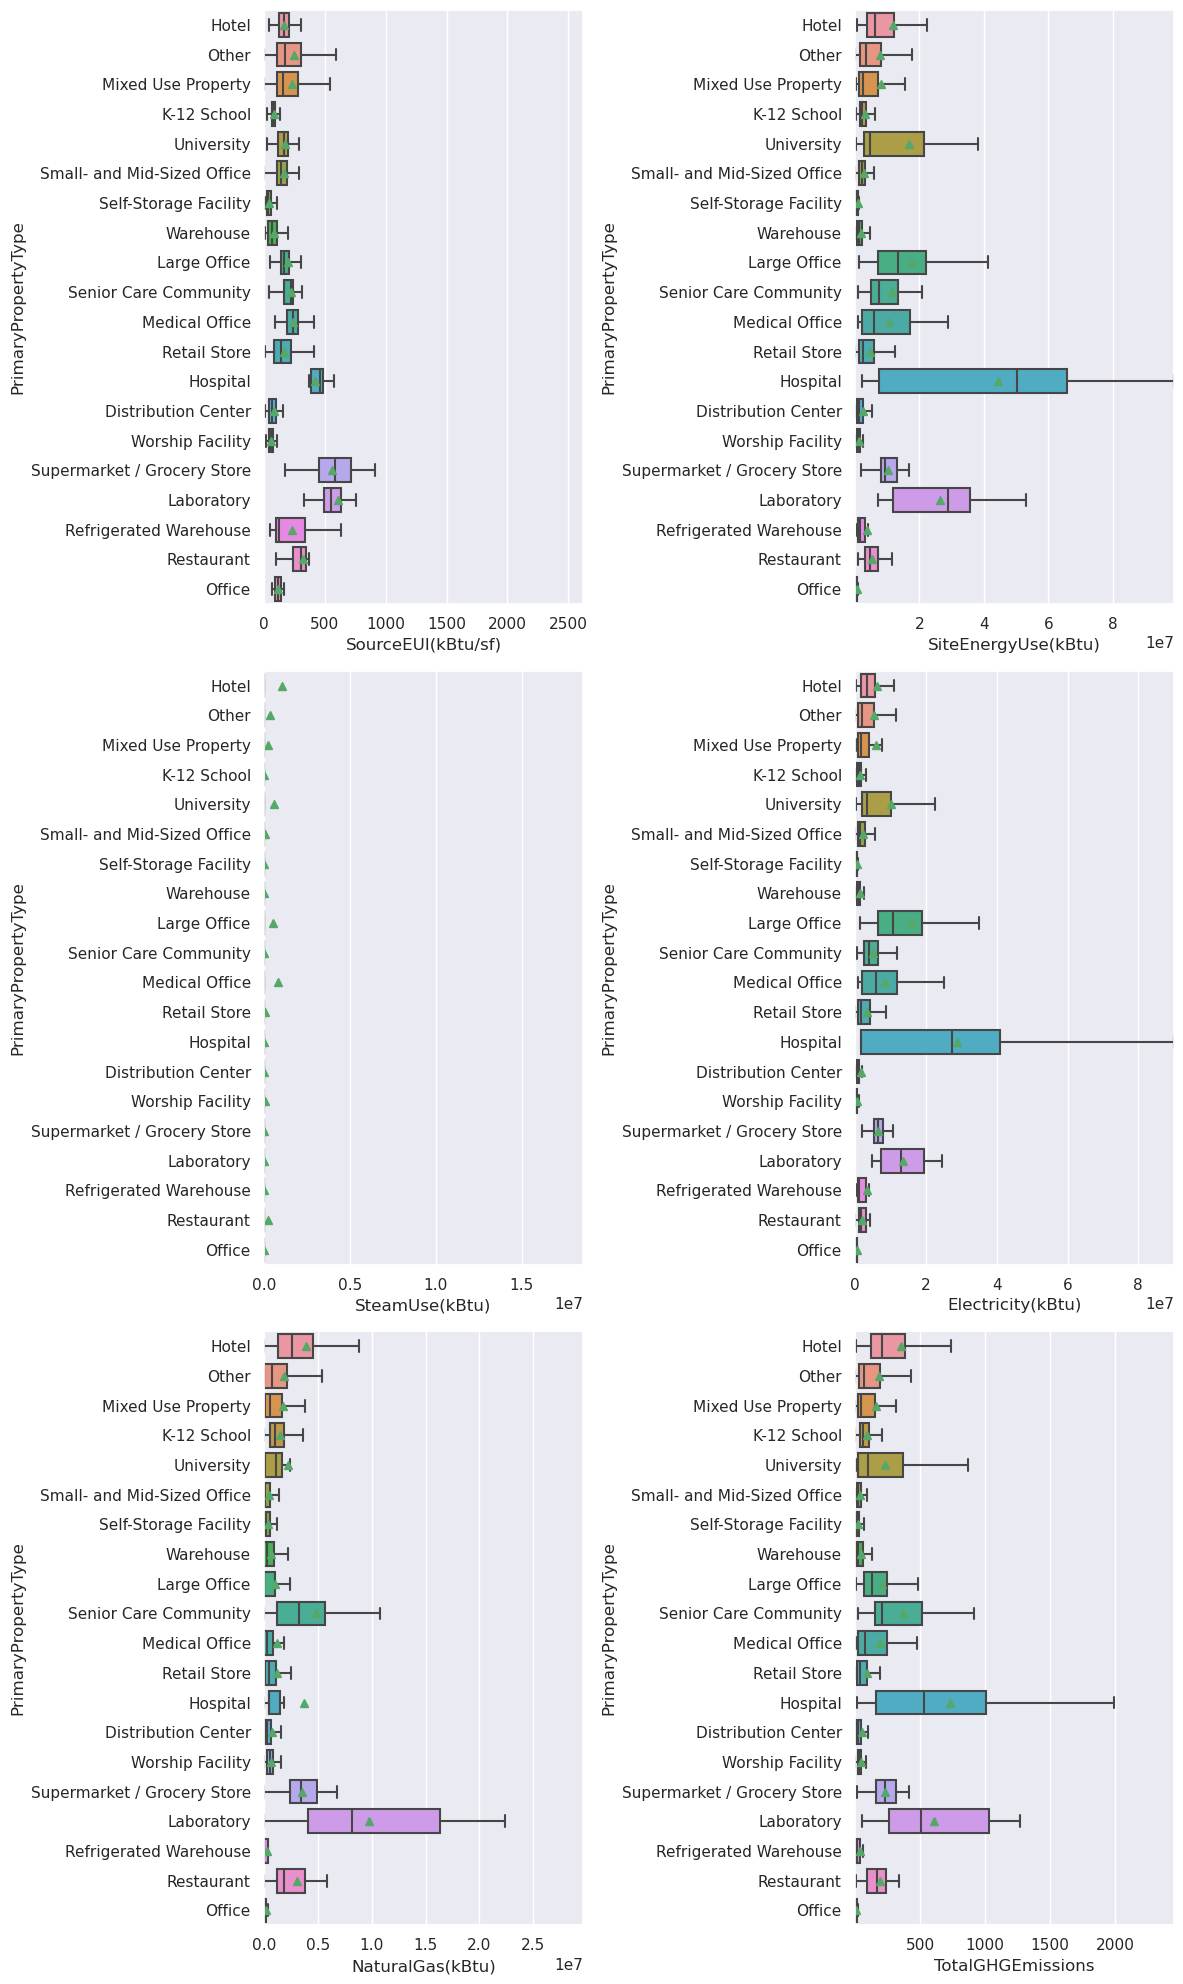

In [151]:
fig, axe = plt.subplots(3,2, figsize=(12,20))
axe = axe.flatten()
for i, feature in enumerate(features):
    sns.boxplot(x=feature, y='PrimaryPropertyType', data=data, ax=axe[i], showfliers=False, showmeans=True)
    axe[i].set_xlim([data[feature].min(), data[feature].max()])
plt.tight_layout()
plt.show()

À la différence des cas précédents, on observe ici une plus grande diversité dans la position, la répartition et l'étendue des valeurs selon les classes. Néanmoins, environ la moitié des classes (K-12 School, Small and MidSized Office, Self-Storage Facility, etc) ont des boxplots très étroits quelle que soit la variable considérée. On peut donc, pour ces classes, assimiler les valeurs des variables à leurs médiane ou moyenne dans la classe avec une marge d'erreur assez faible. Par ailleurs ces classes regroupent la majorité des bâtiments : 

In [152]:
modalites = ['Other', 'K-12 School', 'Small- and Mid-Sized Office', 'Self-Storage Facility', 'Warehouse', 
             'Retail Store', 'Distribution Center', 'Worship Facility', 'Refrigerated Warehouse', 'Office']
data[data.PrimaryPropertyType.isin(modalites)].shape[0]

1120

Pour les autres classes, on assimilera également les valeurs des variables énergétiques à leur médiane ou moyenne avec une marge d'erreur importante cette fois. Mais ce n'est pas très grave ...

Nous allons donc créer de nouvelles variables en considérant les énergies consommées ou les émissions de CO2 émises, et pour chaque propriété, attribuer la valeur médiane des valeurs qui correspondent à son *PrimaryPropertyType*.

Pour toute nouvelle propriété, il sera possible de connaître ses valeurs pour ces nouvelles variables sans avoir à effectué de mesures énergétiques et uniquement à partir de son type : il suffira d'attribuer la valeur médiane des valeurs correspondantes à son type. Les classes de *PrimaryPropertyType* sont exhaustives, car il y a une classe 'Other'. Là encore, aucun problème de data leakage.

Créons maintenant nos nouveaux prédicteurs (on applique à nouveau le *log*) :

In [153]:
# On dénombre pour chaque variable le nombre de valeurs pour chaque type de propriété :
denombrement = data[['PrimaryPropertyType'] + features].groupby('PrimaryPropertyType').count()

for feature in features:
    new_data[feature] = np.log(data[feature]+1)
    classes = denombrement[denombrement[feature] > 1].index   # Pour chaque feature on identifie les classes qui ont plusieurs valeurs.
    for classe in classes:
        new_data.loc[data.PrimaryPropertyType == classe, feature] = \
        np.log(data.loc[data.PrimaryPropertyType == classe, feature].median() + 1) 

new_data[features].nunique()

SourceEUI(kBtu/sf)     20
SiteEnergyUse(kBtu)    20
SteamUse(kBtu)          1
Electricity(kBtu)      20
NaturalGas(kBtu)       20
TotalGHGEmissions      20
dtype: int64

Supprimons la variable *SteamUse(kBtu)* nouvellement créé qui n'a qu'une seule modalité :

In [154]:
new_data.drop(columns='SteamUse(kBtu)', inplace=True)

On renomme ces nouvelles variables :

In [155]:
new_data.rename(columns={'SourceEUI(kBtu/sf)' : 'source_energy_type', 
                         'SiteEnergyUse(kBtu)' : 'energy_type', 
                         'Electricity(kBtu)' : 'electricity_type', 
                         'NaturalGas(kBtu)' : 'gaz_type', 
                         'TotalGHGEmissions' : 'emissions_type'}, inplace=True)

Voilà, c'est terminé ! Nous pouvons à présent créer notre second dataset d'apprentissage 'data_heavy' :

In [156]:
new_data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'ZipCode', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'source_energy_surface', 'energy_surface', 'vapeur_surface',
       'electricity_surface', 'gaz_surface', 'emissions_surface',
       'source_energy_epoque', 'energy_epoque', 'electricity_epoque',
       'gaz_epoque', 'emissions_epoque', 'source_energy_type', 'energy_type',
       'electricity_type', 'gaz_type', 'emissions_type'],
      dtype='object')

In [157]:
data_heavy = new_data
data_heavy.to_csv('data_heavy.csv', index=False)

In [158]:
data_heavy.shape

(1637, 35)

Nous allons aussi créer et exporter les tables de correspondances entre les variables *surface*, *epoque* et *PrimaryPropertyType* d'un côté et les nouveaux prédicteurs de l'autre :

In [159]:
surface_predicteurs = data[['surface'] + features].groupby('surface').median()

# On renomme correctement les colonnes :
surface_predicteurs.rename(columns={'SourceEUI(kBtu/sf)' : 'source_energy_surface', 
                                    'SiteEnergyUse(kBtu)' : 'energy_surface', 
                                    'SteamUse(kBtu)' : 'vapeur_surface',
                                    'Electricity(kBtu)' : 'electricity_surface', 
                                    'NaturalGas(kBtu)' : 'gaz_surface', 
                                    'TotalGHGEmissions' : 'emissions_surface'}, inplace=True)

surface_predicteurs.head()

,source_energy_surface,energy_surface,vapeur_surface,electricity_surface,gaz_surface,emissions_surface
surface,,,,,,
"(11284.999, 11684.756]",140.000000,6.456654e+05,0.0,4.317954e+05,2.138700e+05,14.37
"(11684.756, 11967.654]",138.600006,8.510538e+05,0.0,3.472887e+05,5.037650e+05,29.18
"(11967.654, 12293.403]",139.199997,7.834231e+05,0.0,4.032431e+05,3.801800e+05,23.00
"(12293.403, 12767.839]",161.699997,8.497459e+05,0.0,5.242709e+05,3.254750e+05,20.94
"(12767.839, 13155.815]",618.099976,5.117308e+06,0.0,1.205173e+06,3.912135e+06,216.18


In [160]:
epoque_predicteurs = data[['epoque'] + features].groupby('epoque').median()

# On supprime la variable SteamUse(kBtu) :
epoque_predicteurs.drop(columns='SteamUse(kBtu)', inplace=True)

# On renomme correctement les colonnes :
epoque_predicteurs.rename(columns={'SourceEUI(kBtu/sf)' : 'source_energy_epoque', 
                                    'SiteEnergyUse(kBtu)' : 'energy_epoque', 
                                    'Electricity(kBtu)' : 'electricity_epoque', 
                                    'NaturalGas(kBtu)' : 'gaz_epoque', 
                                    'TotalGHGEmissions' : 'emissions_epoque'}, inplace=True)

epoque_predicteurs.head()

,source_energy_epoque,energy_epoque,electricity_epoque,gaz_epoque,emissions_epoque
epoque,,,,,
"(1899.999, 1903.912]",121.399998,1650329.625,1108753.5,175425.5,26.210
"(1903.912, 1906.0]",123.500000,1989287.000,1537012.0,239681.0,27.930
"(1906.0, 1907.0]",105.400002,2300816.875,2031045.0,152646.0,33.715
"(1907.0, 1908.0]",95.500000,3775187.625,1293561.0,2713055.0,150.880
"(1908.0, 1909.0]",141.200005,2667974.375,1586248.0,198327.5,21.585


In [161]:
type_predicteurs = data[['PrimaryPropertyType'] + features].groupby('PrimaryPropertyType').median()

# On supprime la variable SteamUse(kBtu) :
type_predicteurs.drop(columns='SteamUse(kBtu)', inplace=True)

# On renomme correctement les colonnes :
type_predicteurs.rename(columns={'SourceEUI(kBtu/sf)' : 'source_energy_type', 
                                 'SiteEnergyUse(kBtu)' : 'energy_type', 
                                 'Electricity(kBtu)' : 'electricity_type', 
                                 'NaturalGas(kBtu)' : 'gaz_type', 
                                 'TotalGHGEmissions' : 'emissions_type'}, inplace=True)

type_predicteurs.head()

,source_energy_type,energy_type,electricity_type,gaz_type,emissions_type
PrimaryPropertyType,,,,,
Distribution Center,67.199997,1157977.00,810350.0,310153.0,22.100
Hospital,461.000000,50237016.00,27242486.5,498263.0,531.935
Hotel,167.599998,6351910.00,3243375.5,2578848.0,204.105
K-12 School,79.049999,2100560.75,1066238.5,997503.0,61.910
Laboratory,553.600006,28831819.00,13105001.5,8190253.5,504.805


In [162]:
surface_predicteurs.to_csv('surface_predicteurs.csv')
epoque_predicteurs.to_csv('epoque_predicteurs.csv')
type_predicteurs.to_csv('type_predicteurs.csv')